# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Step1 - Data reading and Understanding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
#NUMBER OF ROWS AND COLUMNS IN DATASET
rows, Cols = data.shape
print(f"Dataset has {rows} rows and {Cols} columns")
#data.shape

Dataset has 1460 rows and 81 columns


In [5]:
#removing white spaces from the Columns
data = data.rename(columns= lambda x: x.strip(),inplace=False)

In [6]:
#Checking percentage of null values against each column
round(100 * data.isnull().sum()[(data.isnull().sum() > 0 )] / len(data), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

# Data Cleaning
 - The following columns can be dropped directly as there are more than 90% of missing values
         - 'Alley',
         - 'PoolQA', 
         - 'MiscFeature' 
         - 'Id' 

Most of the records are NA for these columns and these columns can be dropped directly and id Columns also can be dropped

In [7]:
data.drop(['Alley','PoolQC','MiscFeature','Id'],axis = 1, inplace = True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [8]:
# Check for duplicate records
df1 = data.drop_duplicates()
rows,columns = df1.shape
print(f"There are {rows} after deleting duplicate rows")

There are 1460 after deleting duplicate rows


In [9]:
#Chekcing if there are any duplicate columns, if exists would be removed
df2 = data.loc[:,data.columns.duplicated()].copy()
rows,cols = df1.shape
print(f"There are {cols} duplicate Columns")

There are 77 duplicate Columns


To reduce the features, we can delete the data which has more than 90% of same value for e.g. if the column "LowQualFinSF" has Zero for 1434 records, hence we can delete columns that fall into these category as it doesnt make any sense


Our dataset size is 1460 and we will drop anything that is greater than 90%(which is 1314) of such values which is 

In [10]:
ss = data['LowQualFinSF'].value_counts()
ss

0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64

In [11]:
# Check above comment to understand what is the value 1314 here (1460*90)/100
columns_to_be_removed = []
for cols in data:
    if(data[cols].value_counts().max() >= 1314):
        columns_to_be_removed.append(cols)
print("The list of columns that can be removed due to Column representing 90% of same values are")
print(columns_to_be_removed)

The list of columns that can be removed due to Column representing 90% of same values are
['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [12]:
#Removeing the above list of columns
data.drop(columns_to_be_removed,axis = 1,inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,TA,0,61,0,NaN,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,TA,298,0,0,NaN,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,TA,0,42,0,NaN,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,TA,0,35,272,NaN,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,TA,192,84,0,NaN,12,2008,WD,Normal,250000


In [13]:
#Recheck the missing values
round(100 * data.isnull().sum()[(data.isnull().sum() > 0 )] / len(data), 2)

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
Fence           80.75
dtype: float64

In [14]:
#Imputing Fence value according to the data dictionary
data['Fence'] = data['Fence'].astype("str")
data['Fence'] = data['Fence'].str.replace('nan','No Fence')
data.Fence.value_counts()


No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

In [15]:
# impute the value to nullable rows for GarageFinish
data["GarageFinish"] = data["GarageFinish"].fillna("No Garage")

In [16]:
# imputing vaules to LotFrontage
print(data["LotFrontage"].describe())
print(data["LotFrontage"].value_counts())
data["LotFrontage"] = data["LotFrontage"].replace(np.nan, data["LotFrontage"].median())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64


In [17]:
# imputing vaules to LotFrontage
data["FireplaceQu"] = data["FireplaceQu"].fillna("No Fireplace")
#data["FireplaceQu"].head(10)

In [18]:
# imputing vaules to BsmtQual
data["BsmtQual"] = data["BsmtQual"].fillna("None")
#houseDF["BsmtQual"].value_counts()

In [19]:
# imputing vaules to BsmtCond
data["BsmtCond"] = data["BsmtCond"].fillna("None")

In [20]:
# imputing vaules to BsmtExposure
data["BsmtExposure"] = data["BsmtExposure"].fillna("None")

In [21]:
# imputing vaules to BsmtFinType1
data["BsmtFinType1"] = data["BsmtFinType1"].fillna("None")

In [22]:
# imputing vaules to BsmtFinType2
data["BsmtFinType2"] = data["BsmtFinType2"].fillna("None")

In [23]:
# imputing MasVnrArea column null values
data["MasVnrArea"] = data["MasVnrArea"].replace(np.nan, data["MasVnrArea"].median())
data["MasVnrArea"] = data["MasVnrArea"].astype('int')

In [24]:
# imputing vaules to LotFrontage
data["LotFrontage"] = data["LotFrontage"].replace(np.nan, data["LotFrontage"].median())

In [25]:
# impute the value to nullable rows for GarageFinish
data["GarageFinish"] = data["GarageFinish"].fillna("No Garage")

In [26]:
# impute the value to nullable rows for MasVnrType
data['MasVnrType'] = data['MasVnrType'].fillna("None")
data['MasVnrType'].value_counts()/len(data['MasVnrType'])*100

None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

In [27]:
# impute the value to nullable rows for GarageType
data["GarageType"] = data["GarageType"].astype('str')
data["GarageType"] = data["GarageType"].str.replace("nan", "No Garage")
data['GarageType'].value_counts()/len(data['GarageType'])*100

Attchd       59.589041
Detchd       26.506849
BuiltIn       6.027397
No Garage     5.547945
Basment       1.301370
CarPort       0.616438
2Types        0.410959
Name: GarageType, dtype: float64

In [28]:
data = data.dropna(axis=0)

In [29]:
# checking for the remaining null values in the dataset
round(100*data.isnull().sum()[(data.isnull().sum()>0)]/len(data), 2)

Series([], dtype: float64)

In [30]:
#Checking dataset size after dropping missing rows
rows,columns = data.shape
print(f"There are {rows} rows and {columns} in the dataset now")

There are 1379 rows and 59 in the dataset now


Plotting Garage related columns with the target variable Sales price

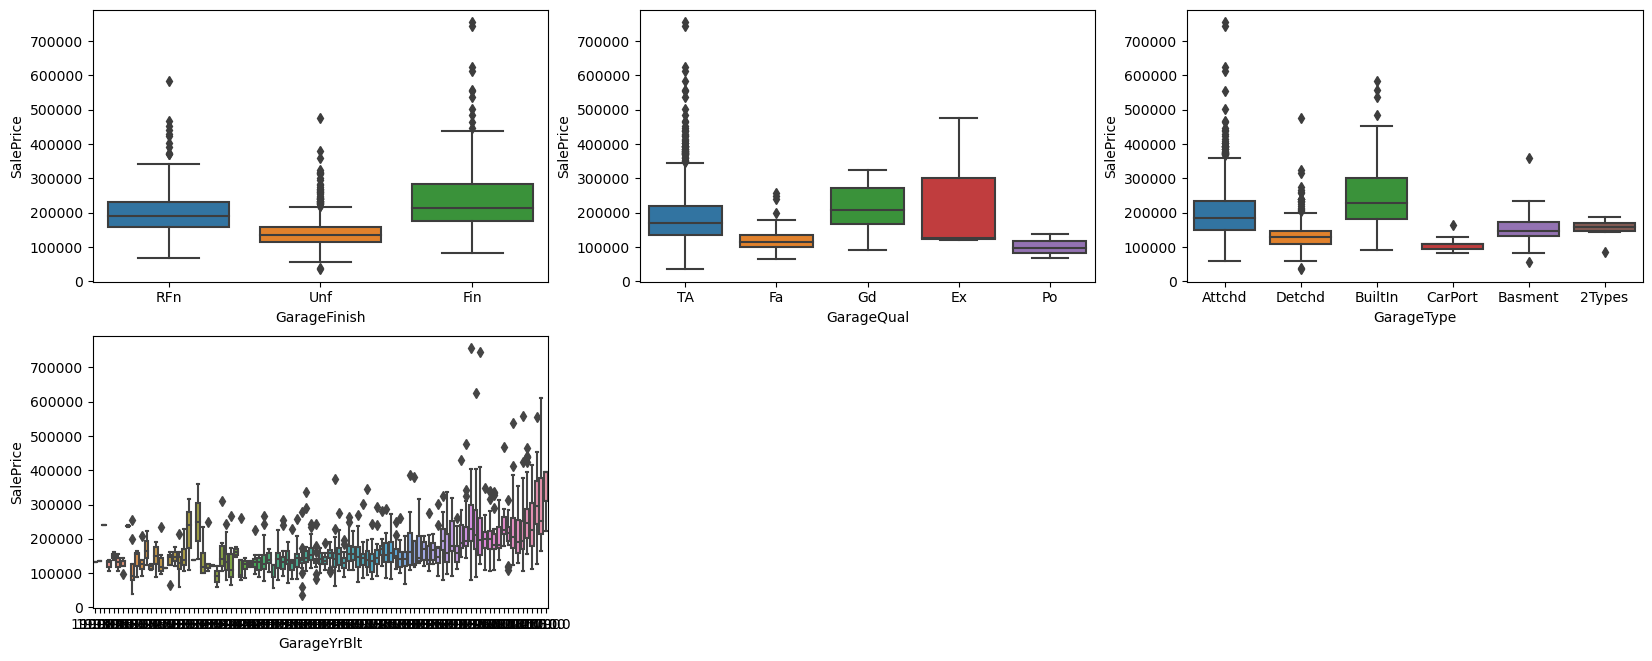

In [31]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageType',y = 'SalePrice', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'GarageYrBlt',y = 'SalePrice', data = data)
plt.show()

In [32]:
#From the above plots GarageQual, MasVnrArea are less influence varibles, so we can drop them
data.drop(["GarageQual","MasVnrArea"], axis=1, inplace=True)
data.shape

(1379, 57)

<AxesSubplot:>

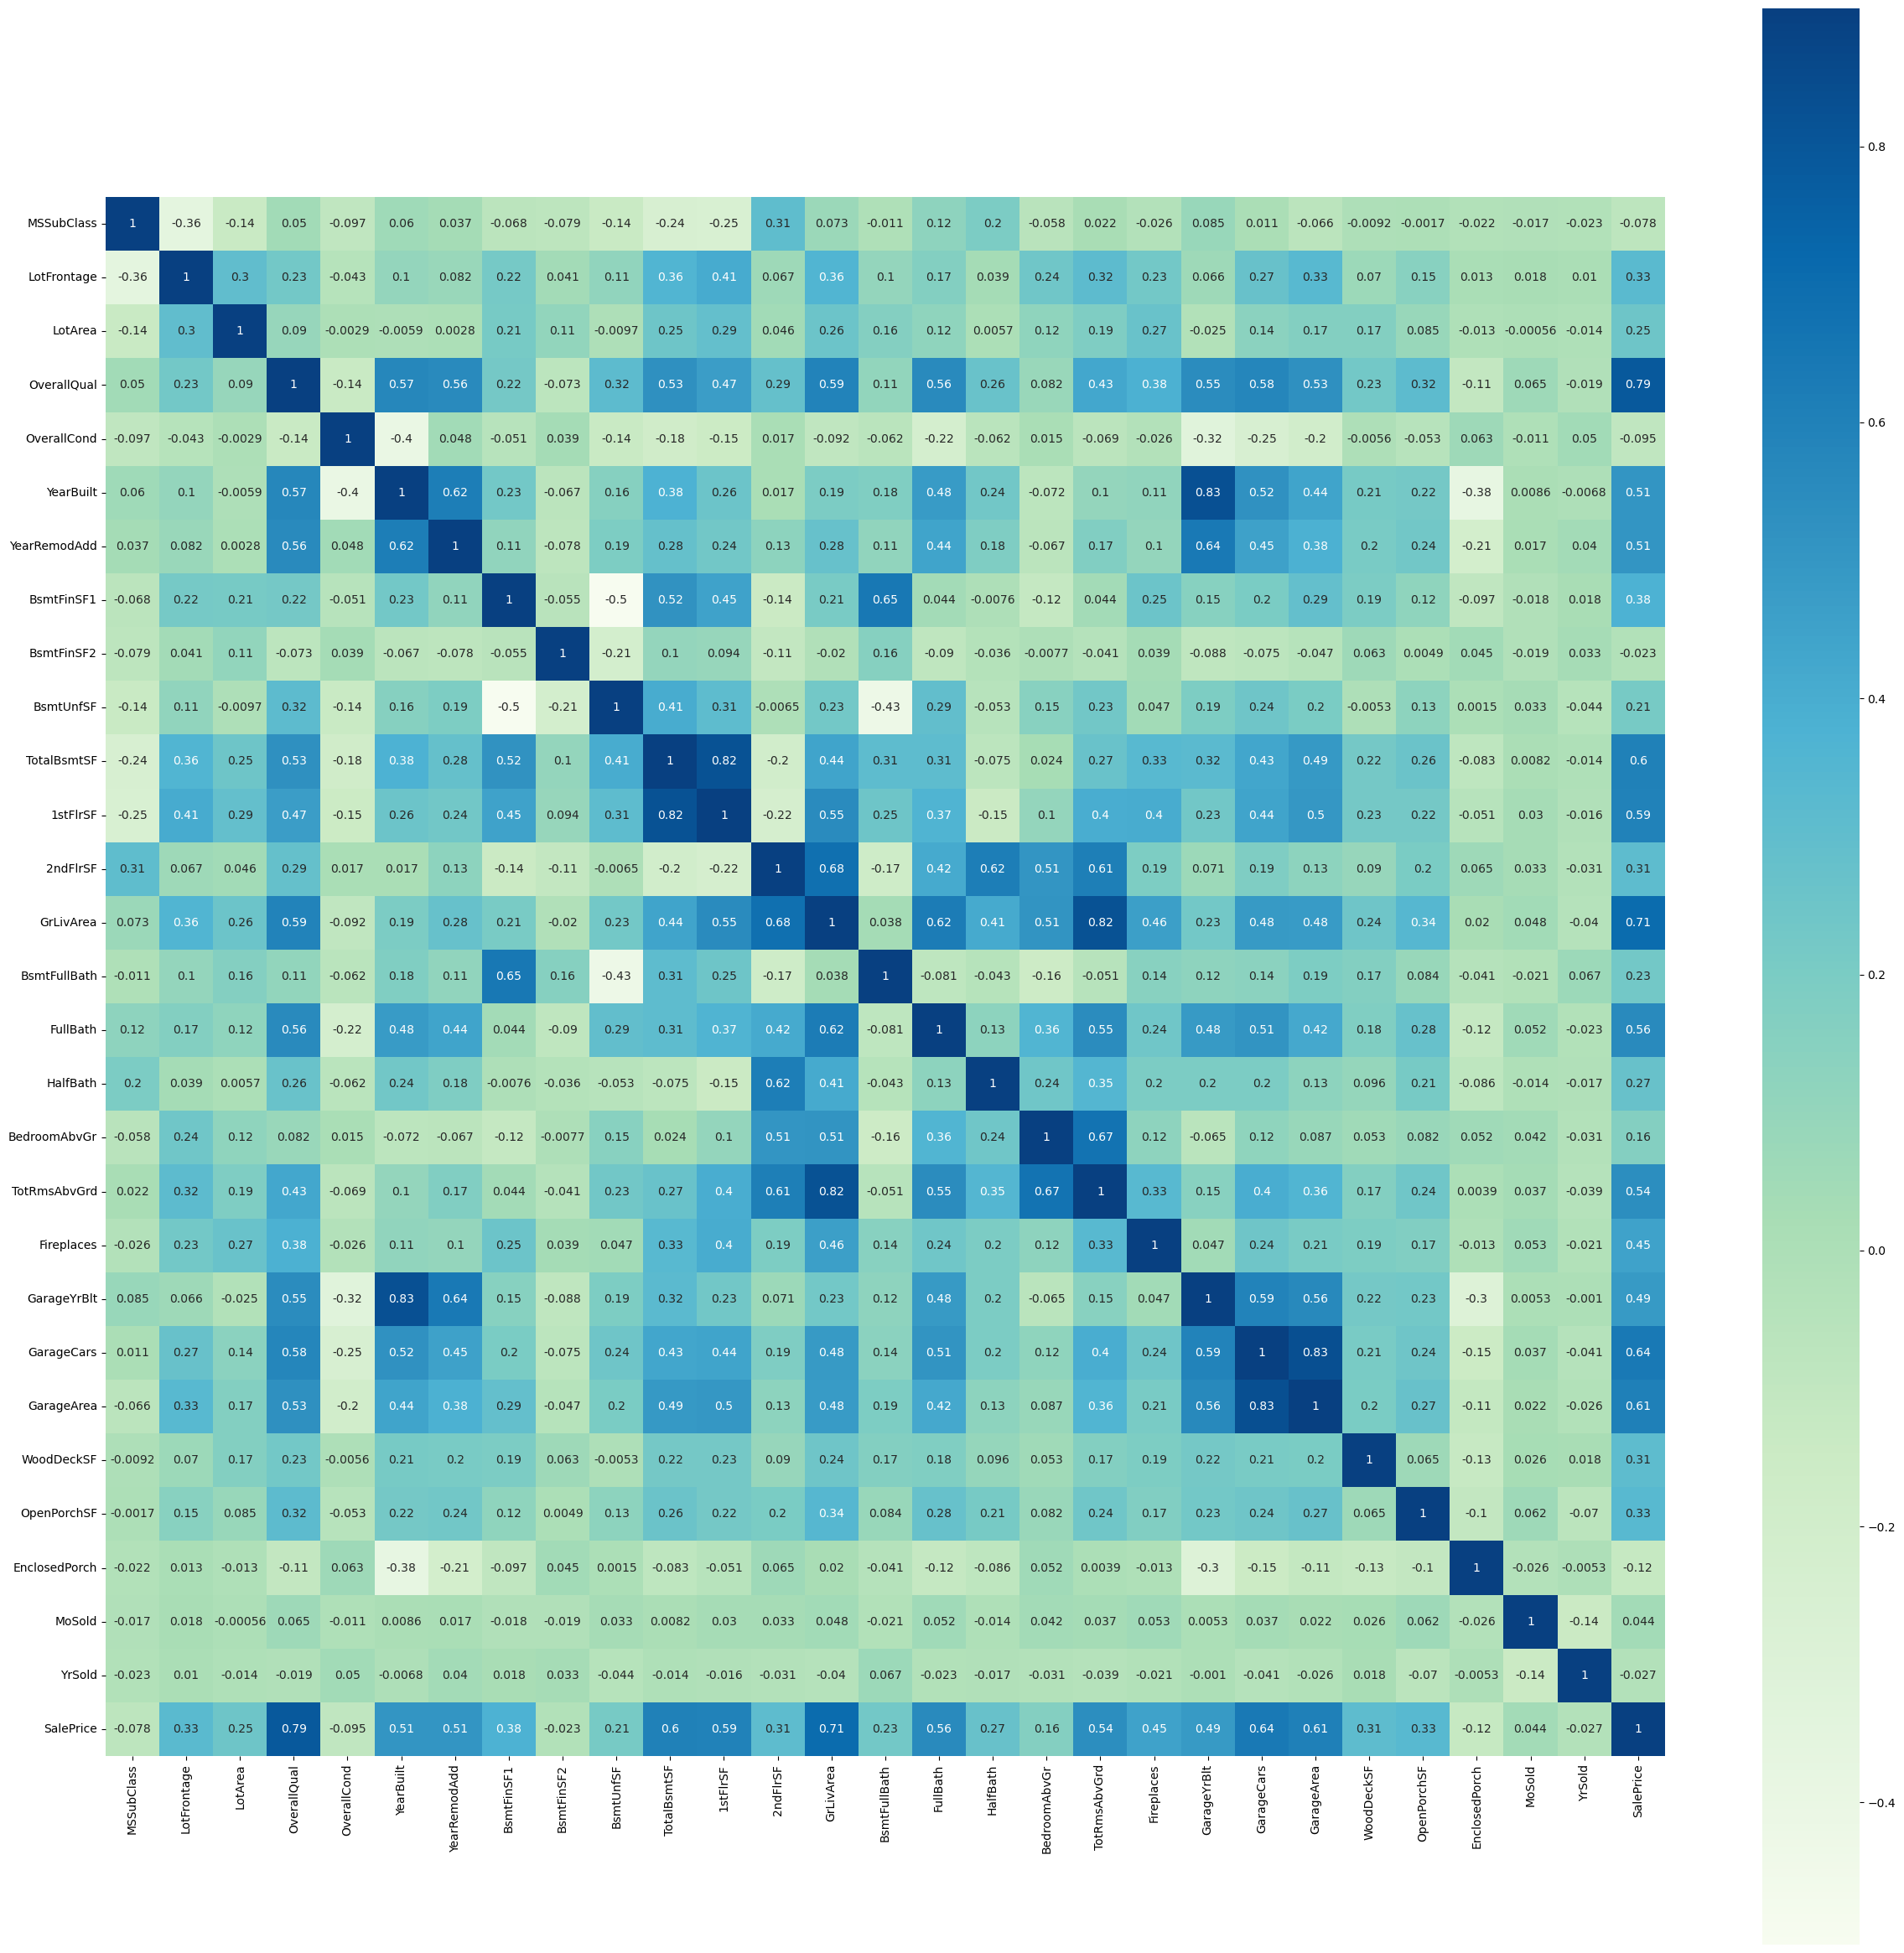

In [33]:
#Correlation map to see how features are correlated with SalePrice
plt.subplots(figsize=(30,30))
sns.heatmap(data.corr(), cmap="GnBu", vmax=0.9, square=True, annot = True)

OverAllQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1srFlrSF, GRLiveArea, TotRmsAbvGrd there features are decently positive co-related to the target variable SalesPrice

In [34]:
# Checking outliers at 25%,50%,75%,90%,95% and above

data.describe(percentiles=[.25,.5,.75,.90,.95,.99]).transpose()

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
MSSubClass,1379.0,56.022480,41.026897,20.0,20.0,50.0,70.0,120.0,160.0,190.00,190.0
LotFrontage,1379.0,70.375635,21.940932,21.0,60.0,69.0,79.0,92.2,104.1,134.66,313.0
LotArea,1379.0,10695.812183,10214.702133,1300.0,7741.0,9591.0,11708.5,14574.6,17506.9,39321.80,215245.0
OverallQual,1379.0,6.187092,1.345780,2.0,5.0,6.0,7.0,8.0,8.0,10.00,10.0
OverallCond,1379.0,5.577955,1.081031,2.0,5.0,5.0,6.0,7.0,8.0,9.00,9.0
YearBuilt,1379.0,1972.958666,29.379883,1880.0,1955.0,1976.0,2001.0,2006.0,2007.0,2009.00,2010.0
YearRemodAdd,1379.0,1985.435098,20.444852,1950.0,1968.0,1994.0,2004.0,2007.0,2007.0,2009.00,2010.0
BsmtFinSF1,1379.0,455.578680,459.691379,0.0,0.0,400.0,732.0,1079.6,1277.3,1580.26,5644.0
BsmtFinSF2,1379.0,48.102248,164.324665,0.0,0.0,0.0,0.0,125.4,401.1,847.16,1474.0
BsmtUnfSF,1379.0,570.765047,443.677845,0.0,228.0,476.0,811.0,1237.6,1471.0,1796.10,2336.0


In [35]:
data['YearBuilt_Diff'] = pd.datetime.now().year - data['YearBuilt']
data['YearRemodAdd_Diff'] = pd.datetime.now().year - data['YearRemodAdd']
data['GarageYrBlt_Diff'] = pd.datetime.now().year - data['GarageYrBlt']

In [36]:
numerical_cols = ['LotArea', 'TotalBsmtSF',
                  '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                  'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'YearBuilt_Diff', 'YearRemodAdd_Diff', 'GarageYrBlt_Diff',
                  'SalePrice']
len(numerical_cols)

19

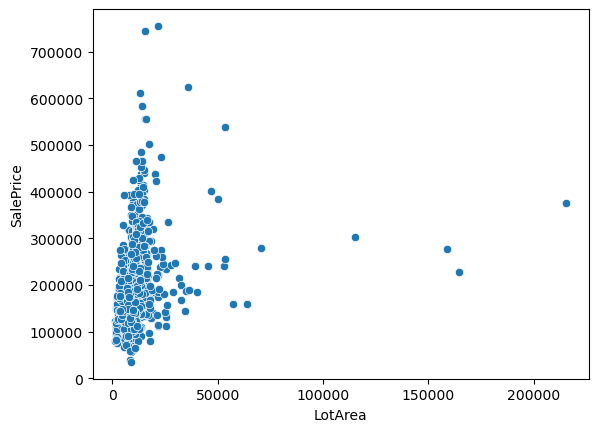

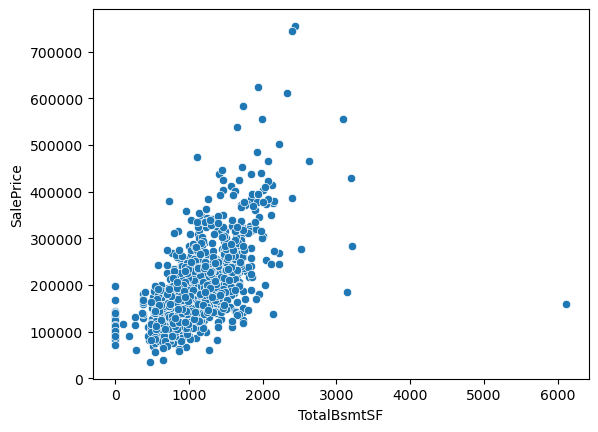

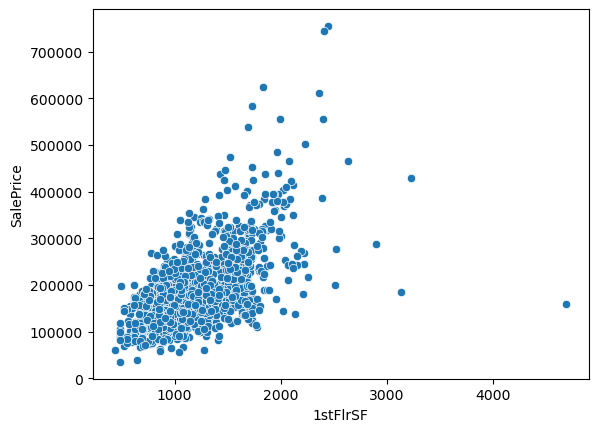

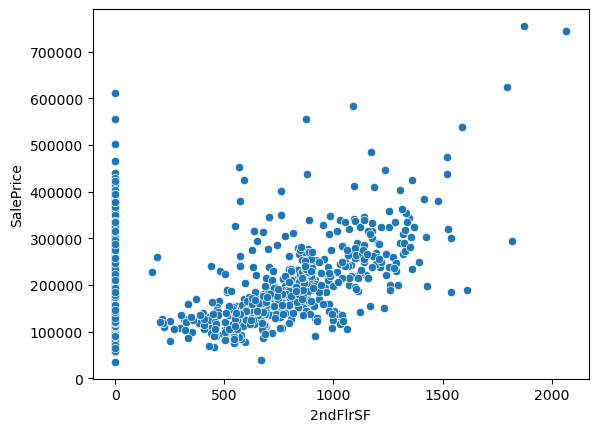

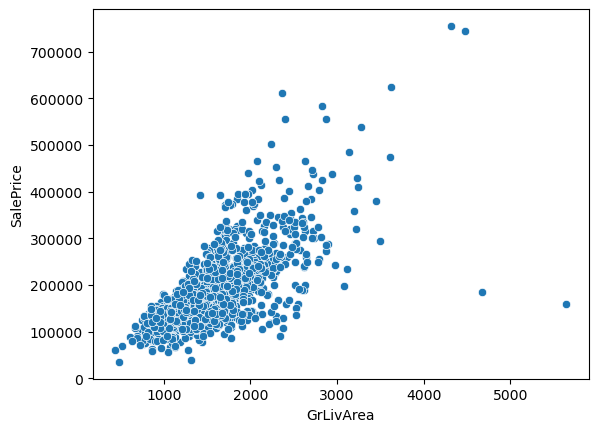

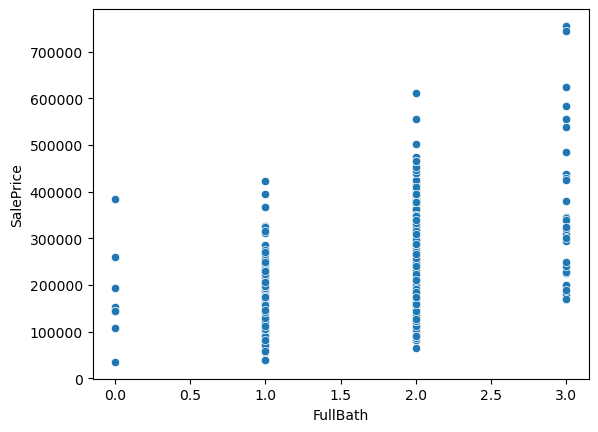

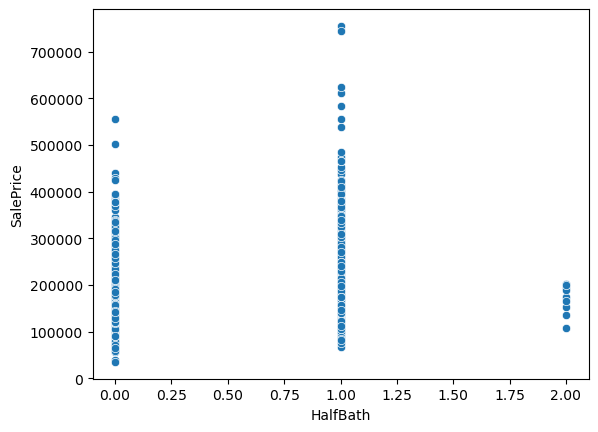

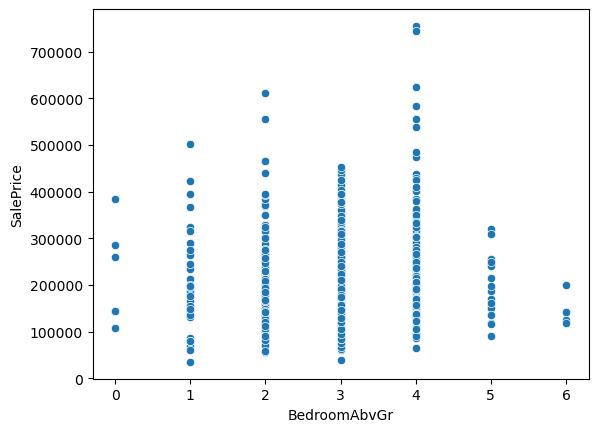

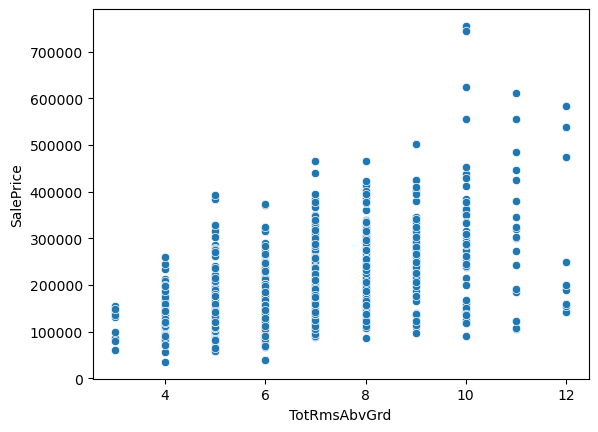

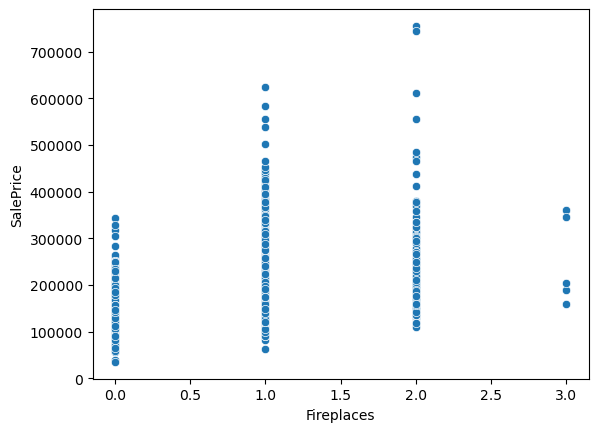

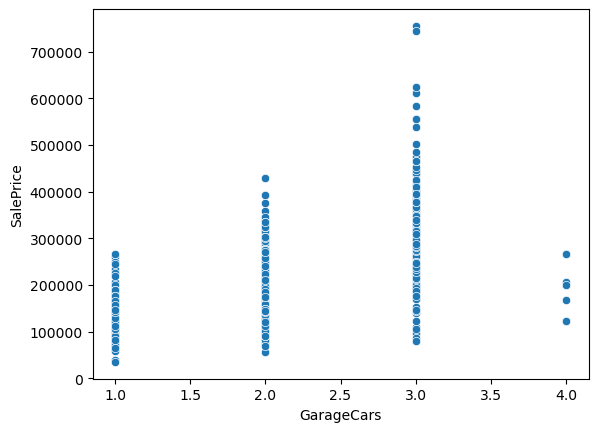

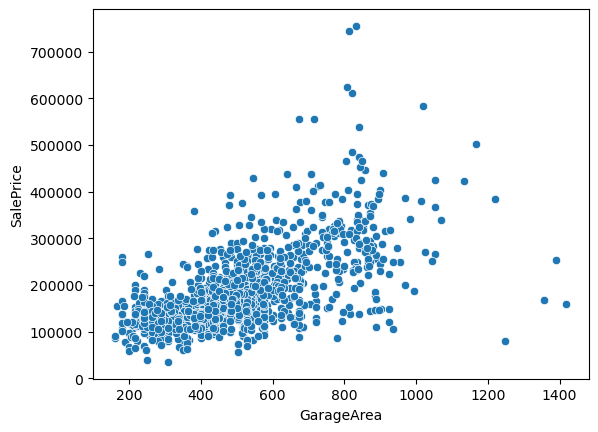

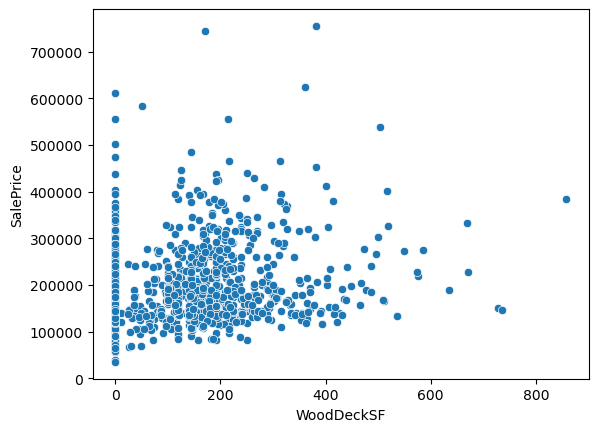

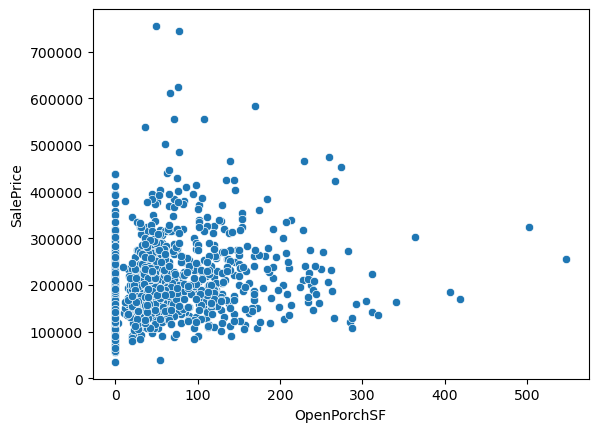

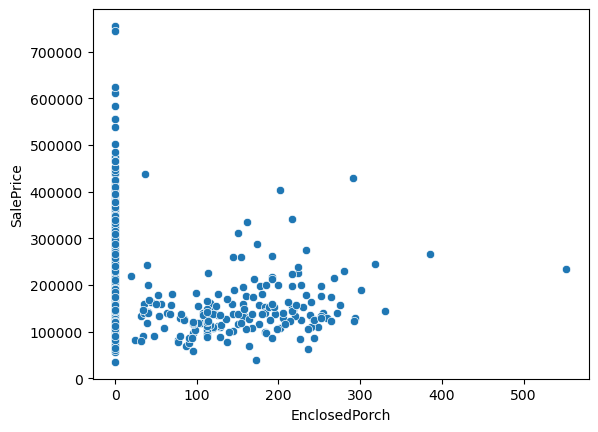

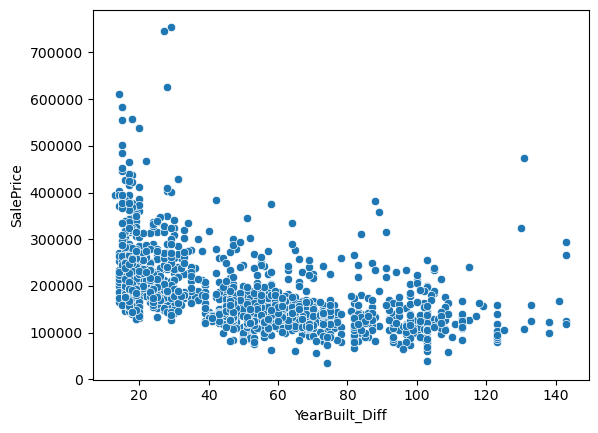

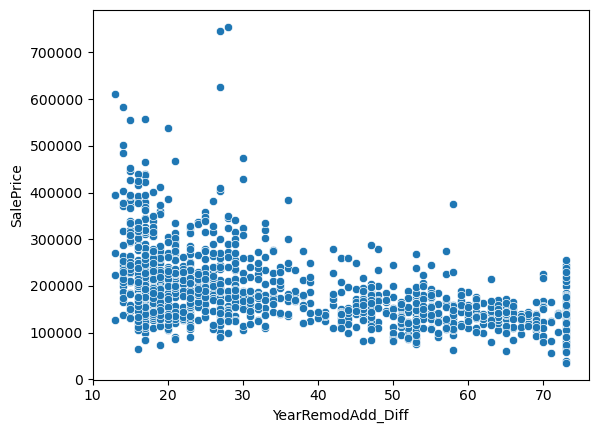

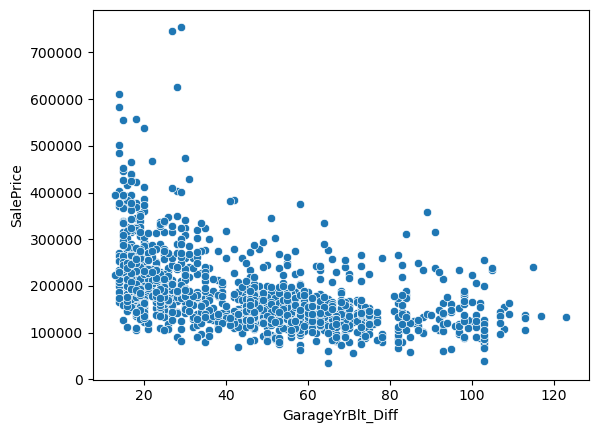

In [37]:
### for the numeric columns

for col in numerical_cols[:-1]:  # Excluding the 'SalePrice' column
    sns.scatterplot(x=col, y='SalePrice', data=data)
    plt.show()

Creating boxp lots for the categorical variables

In [38]:
categorical_cols = ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour',
                    'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
                    'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
                    'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                     'KitchenQual', 'GarageType', 'GarageFinish', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

len(categorical_cols)

31

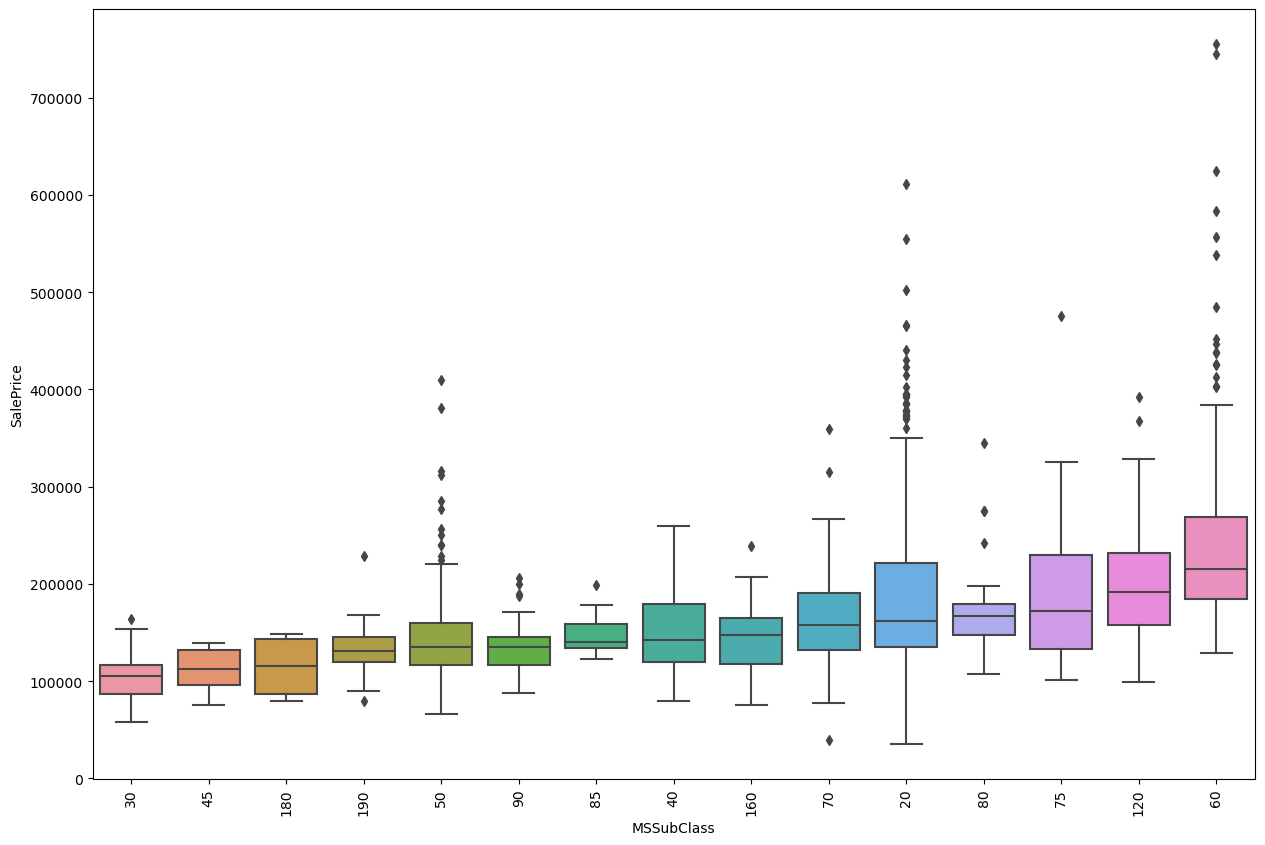

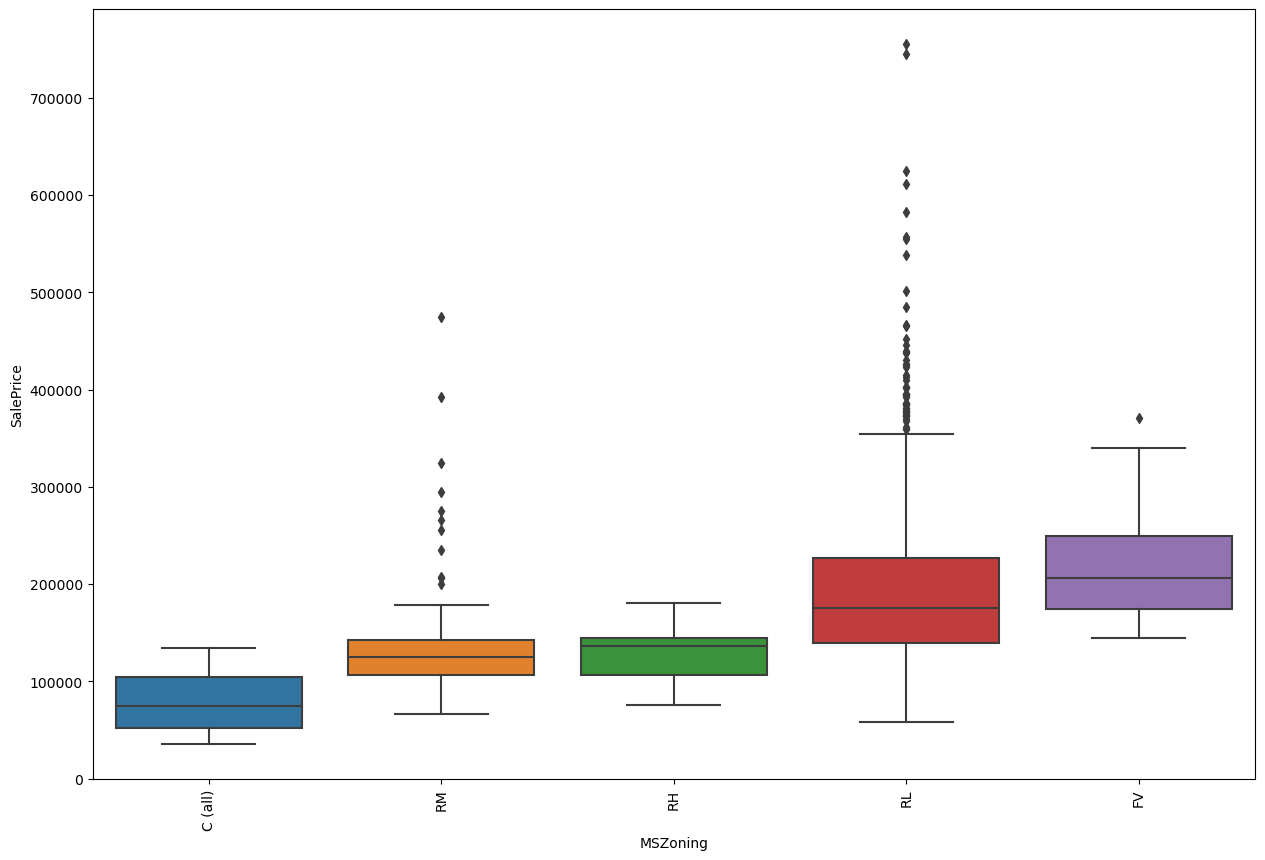

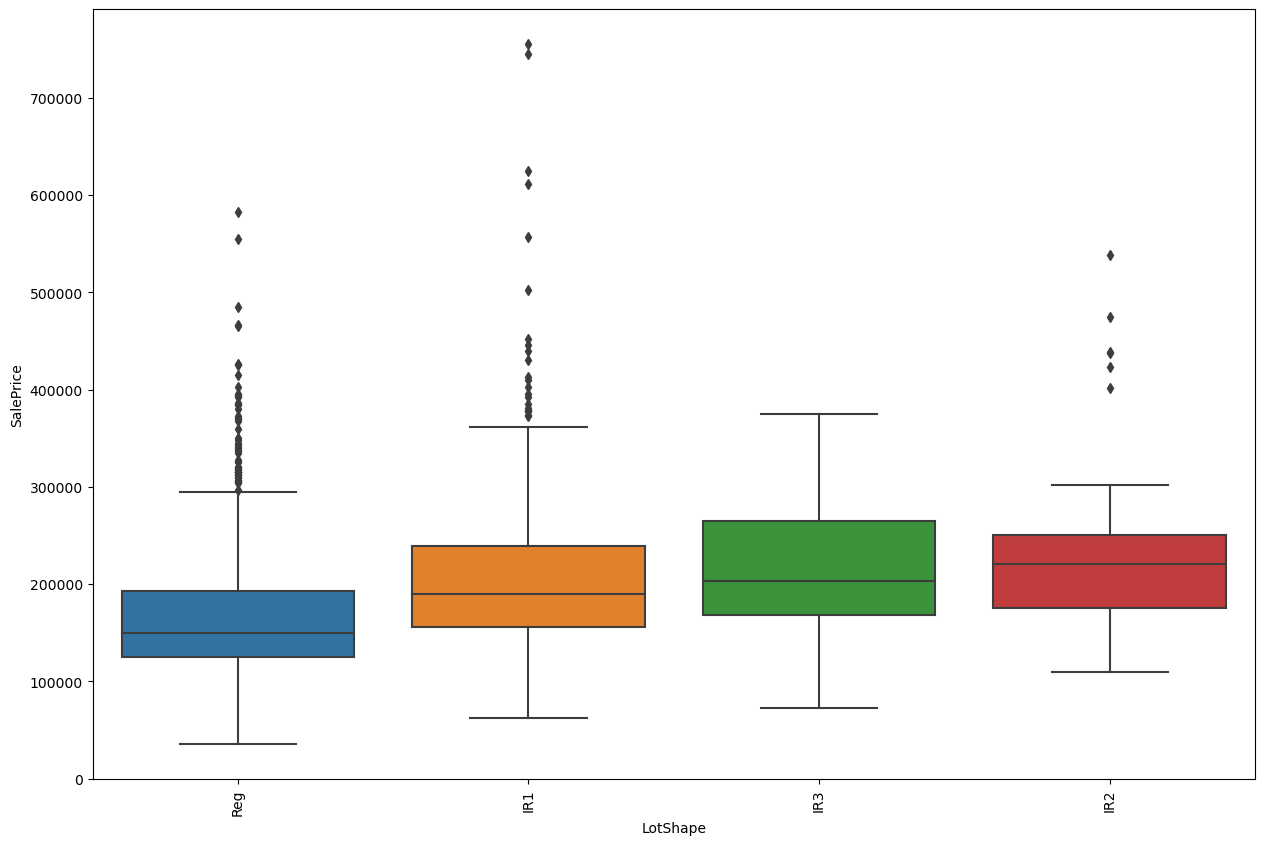

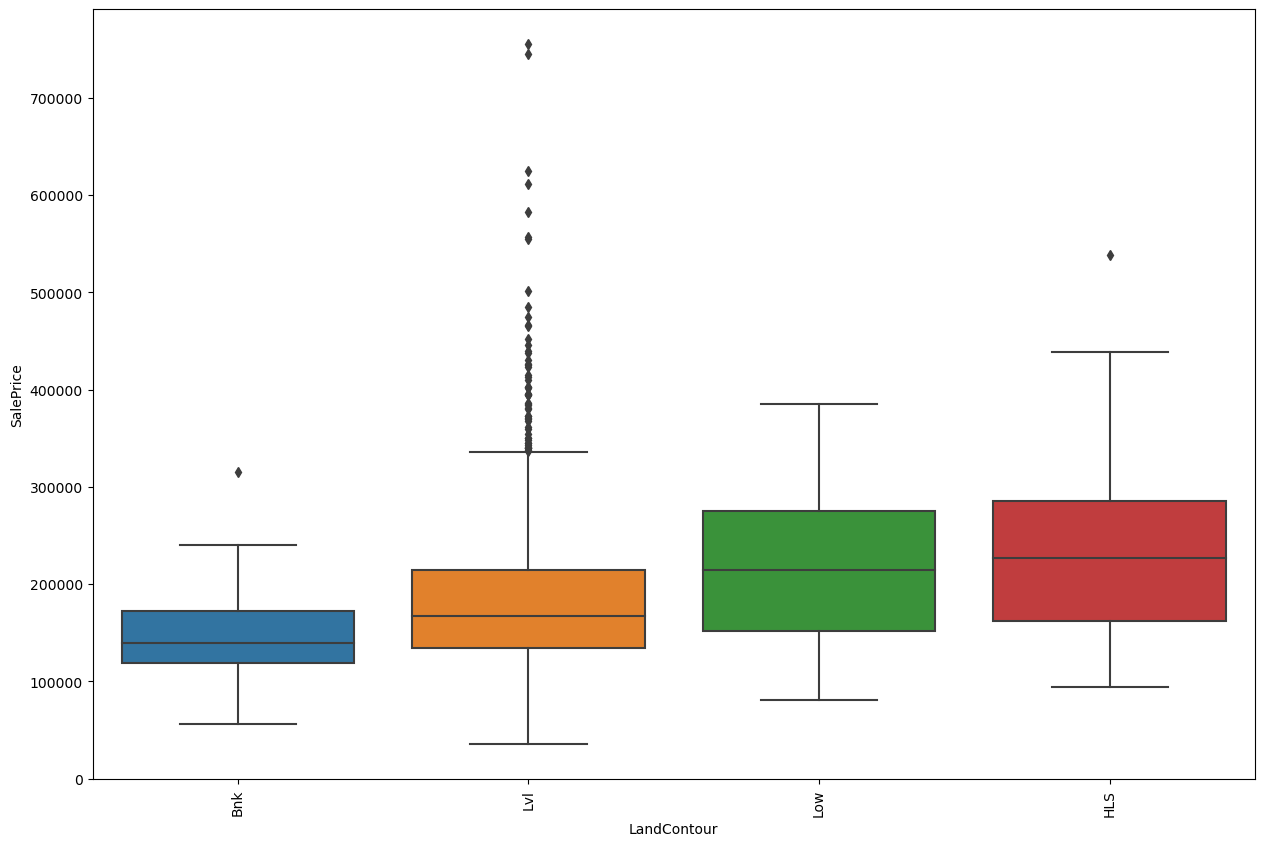

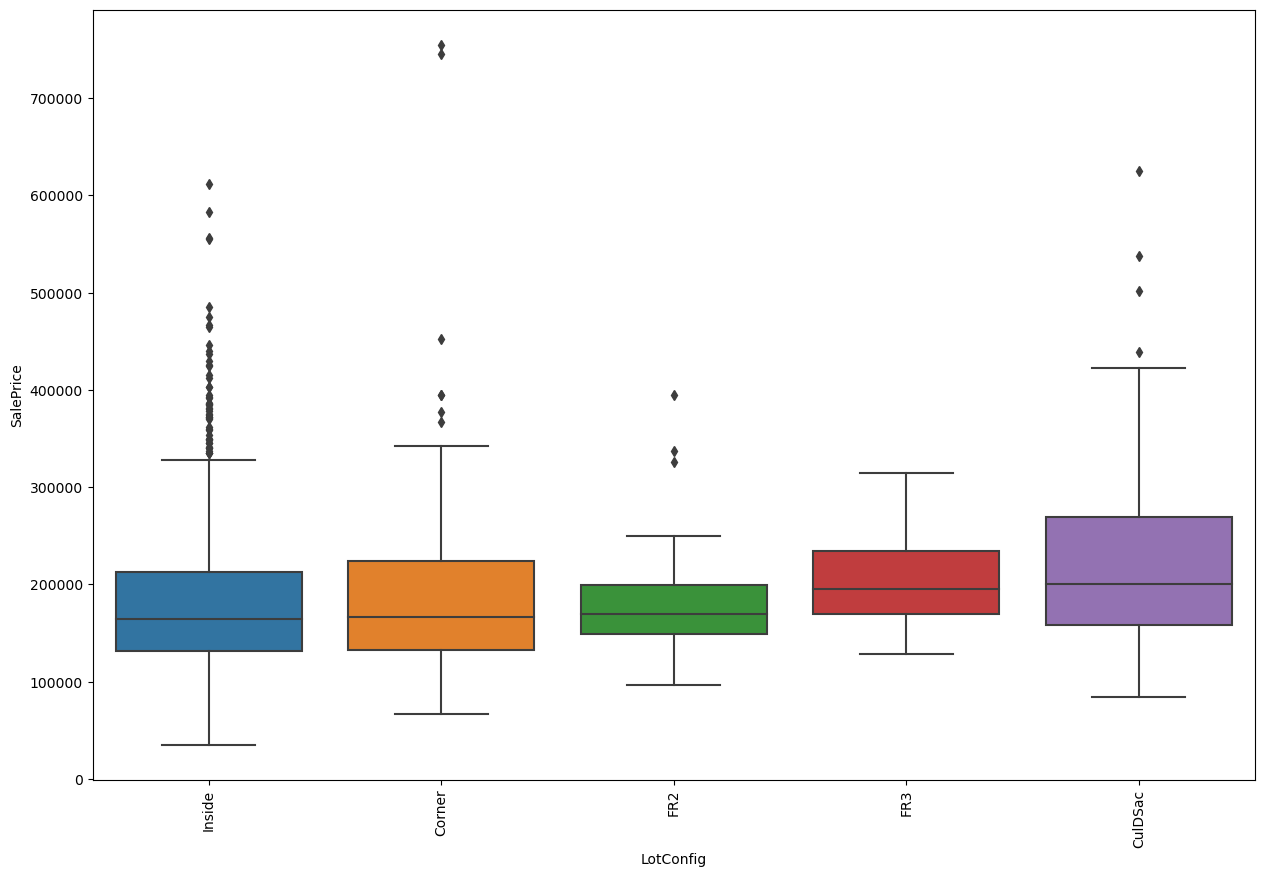

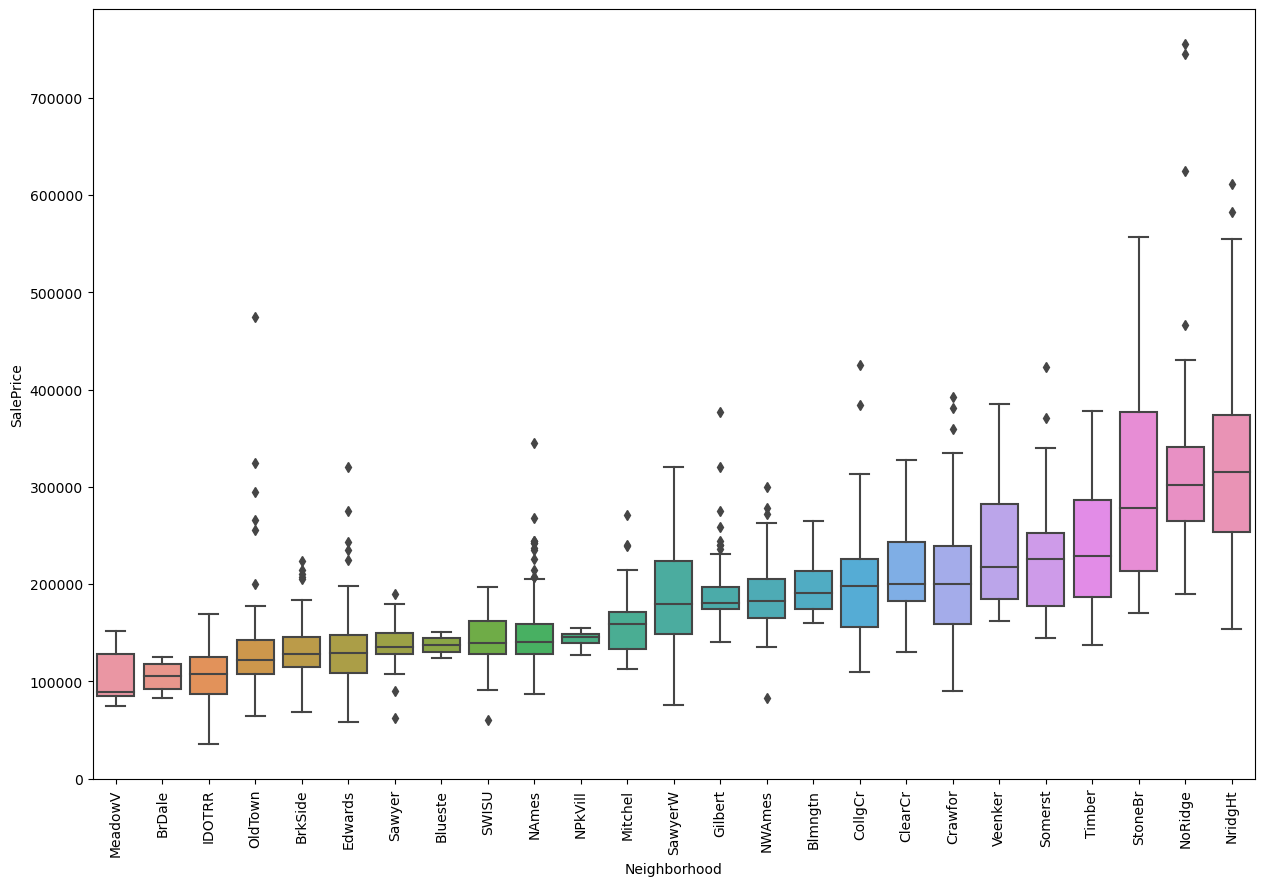

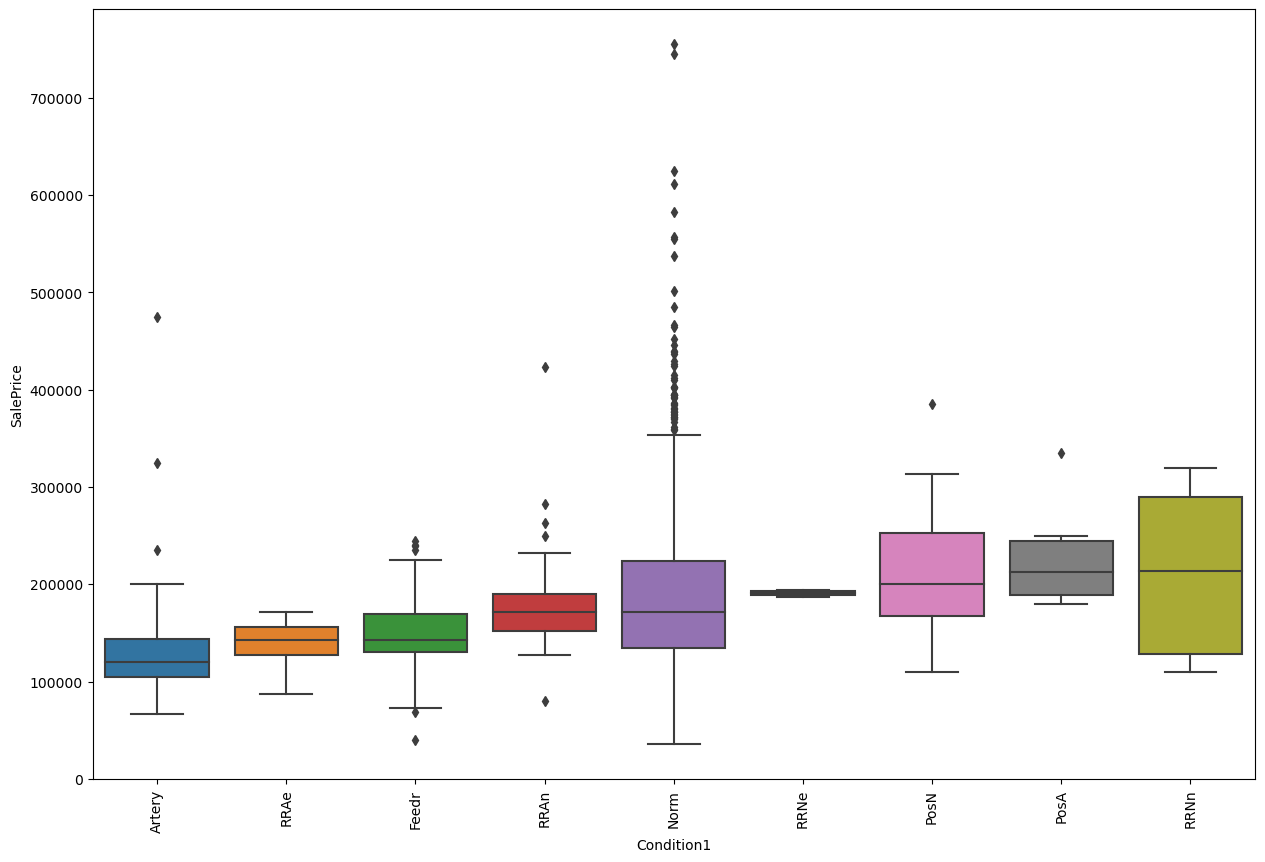

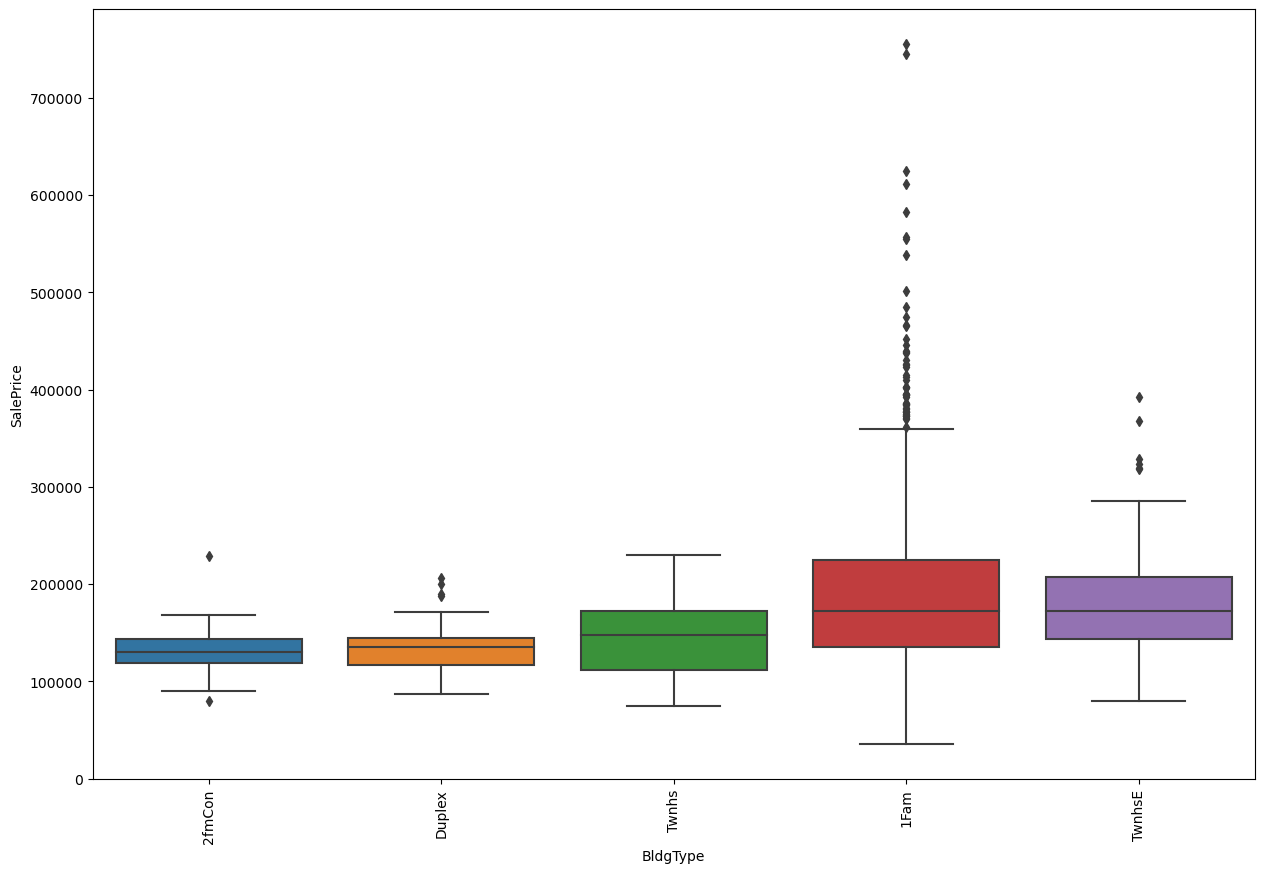

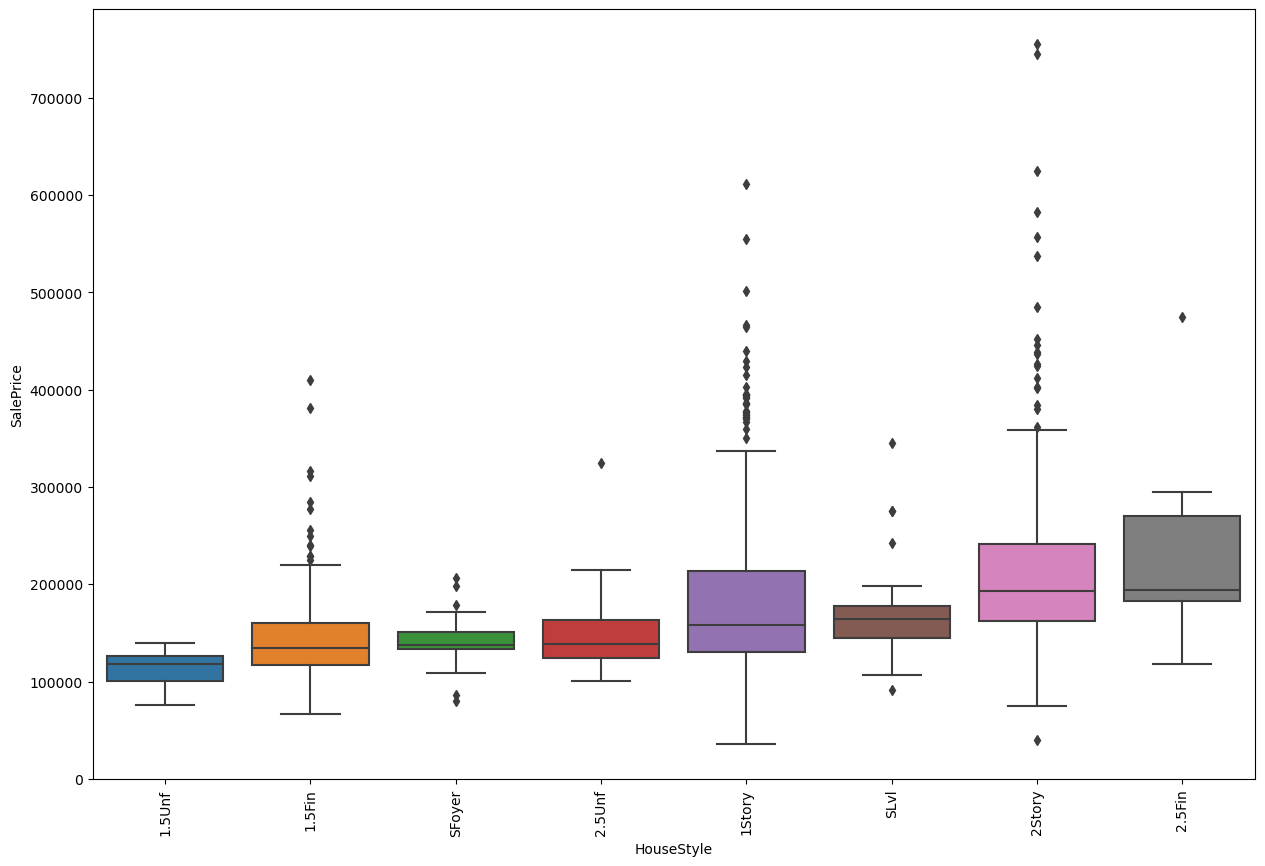

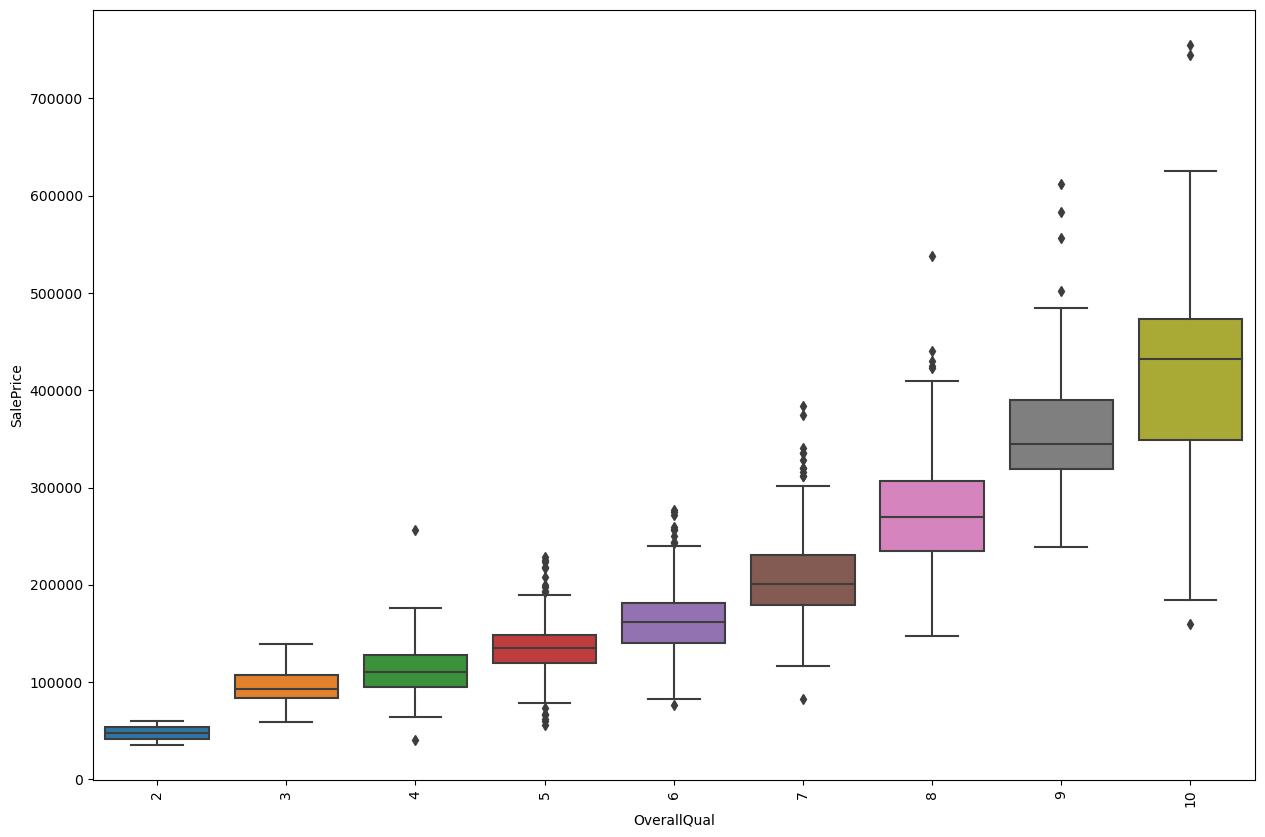

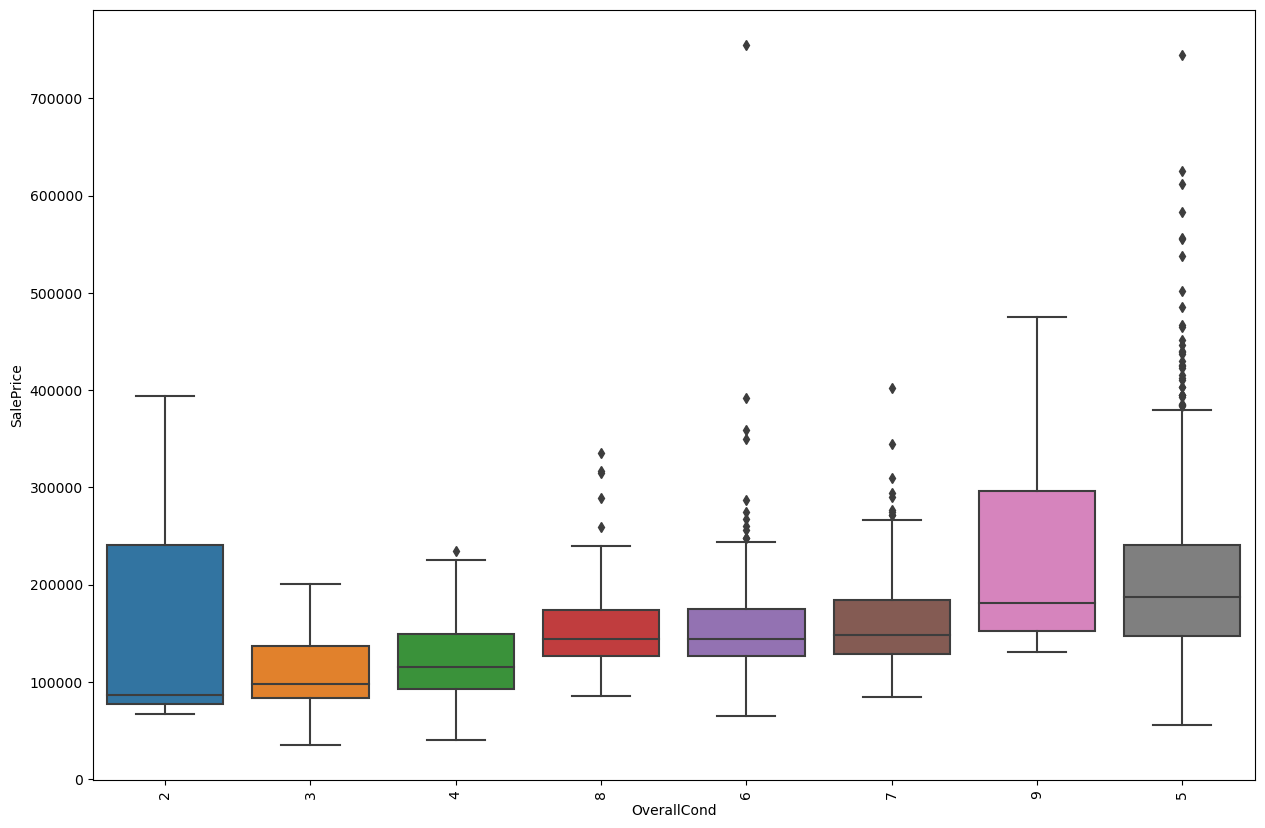

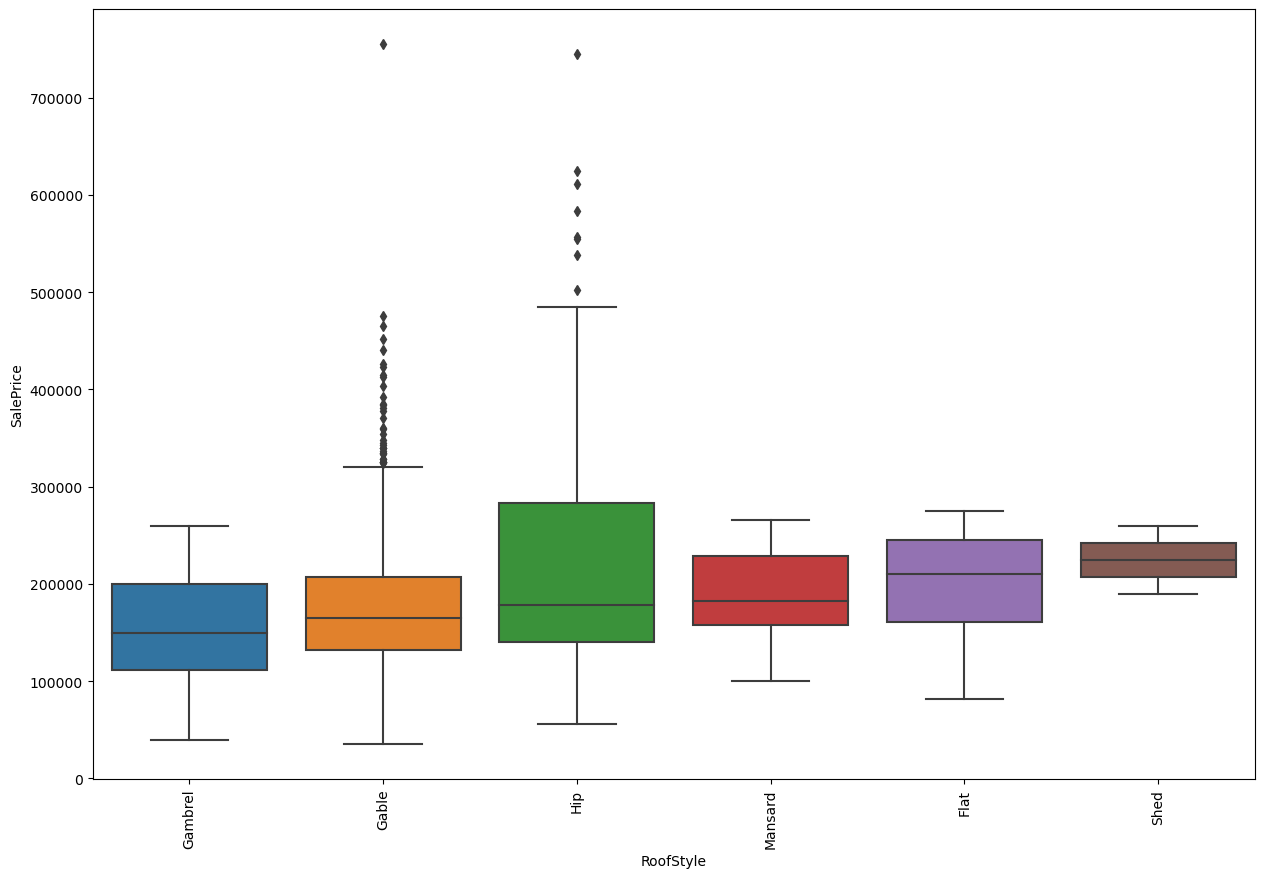

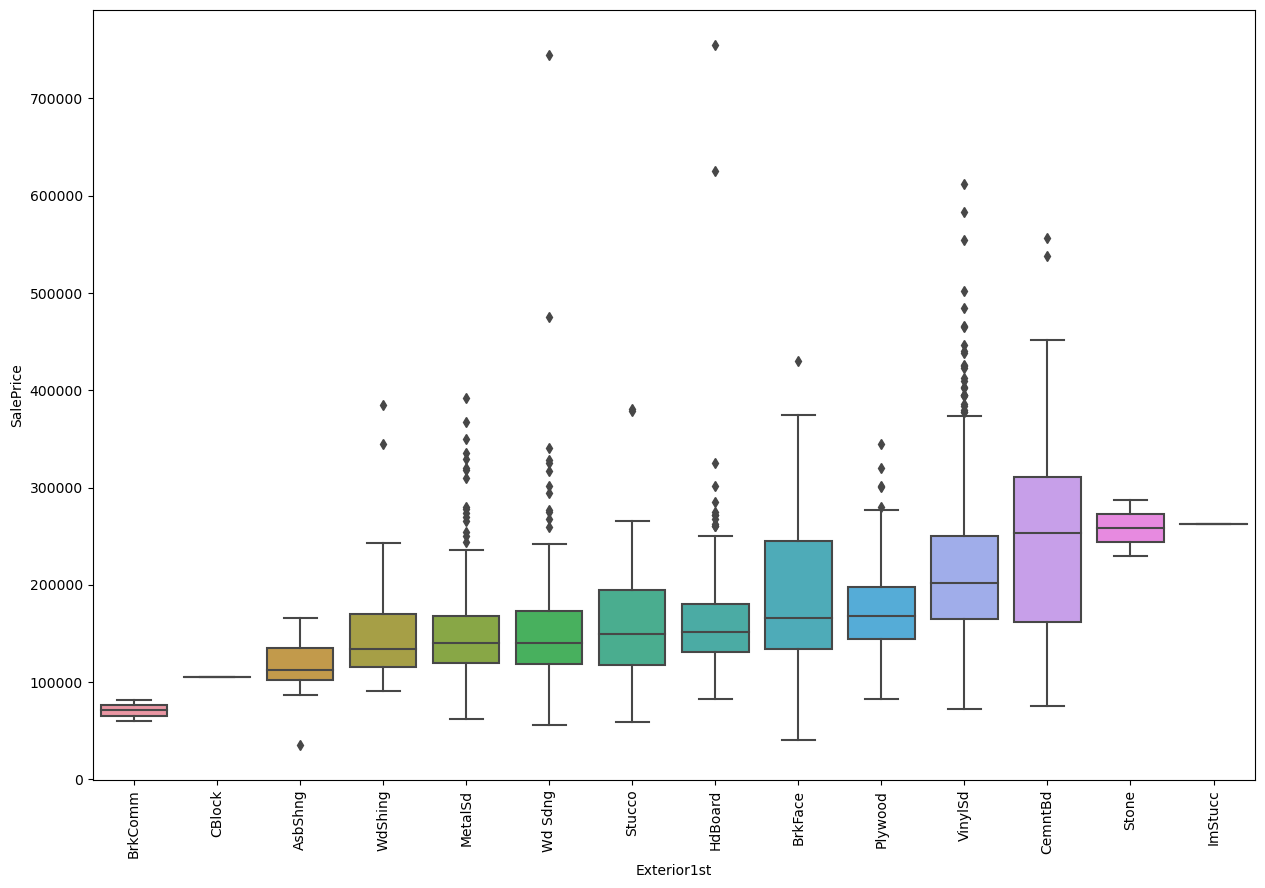

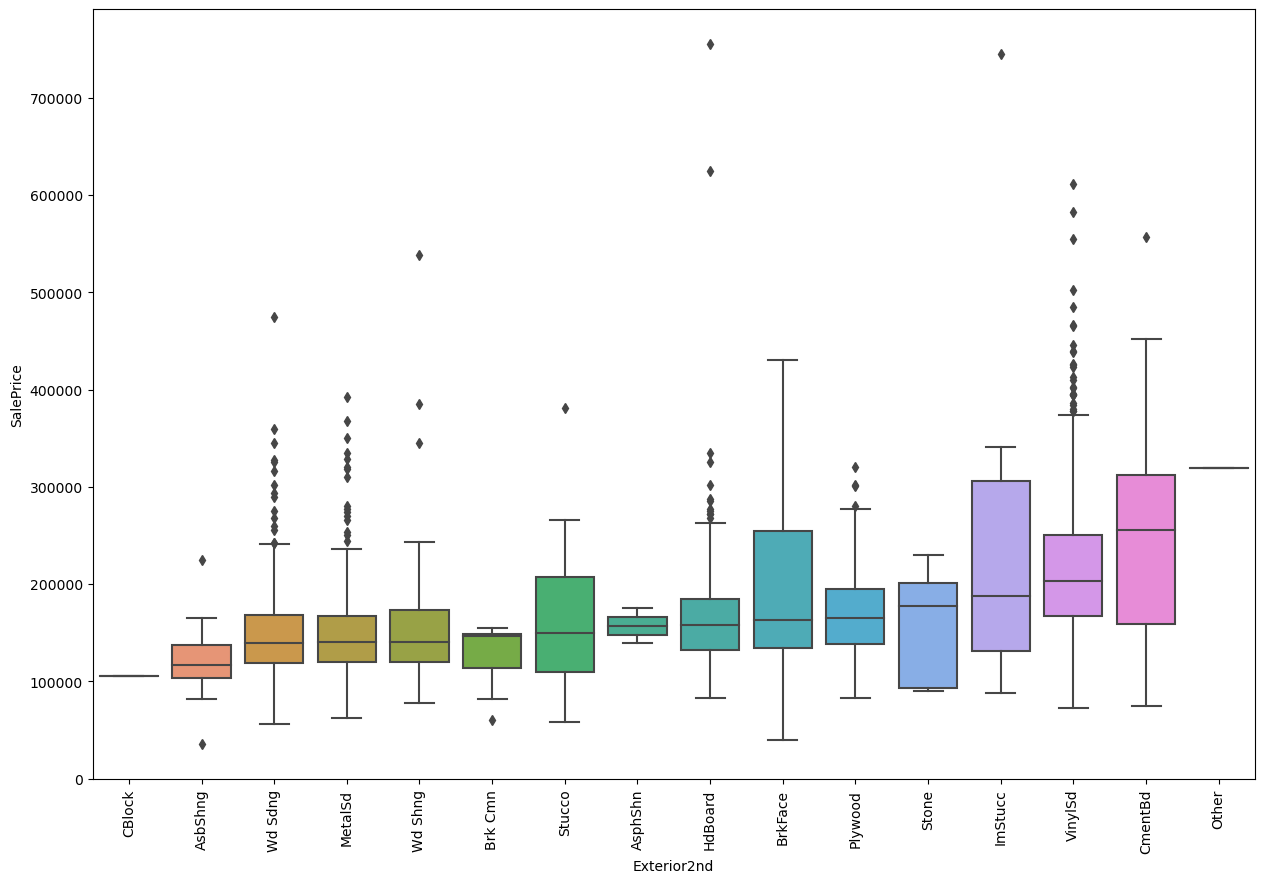

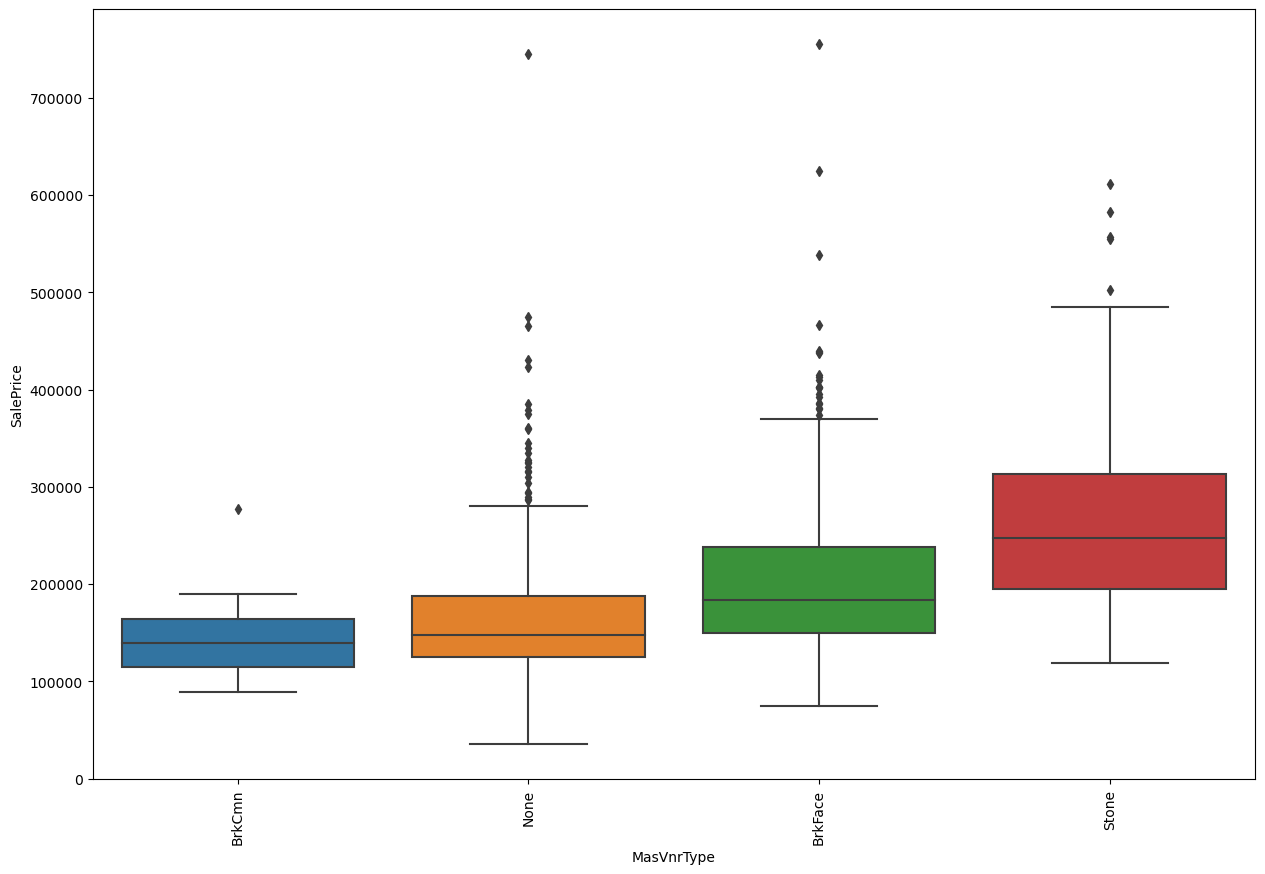

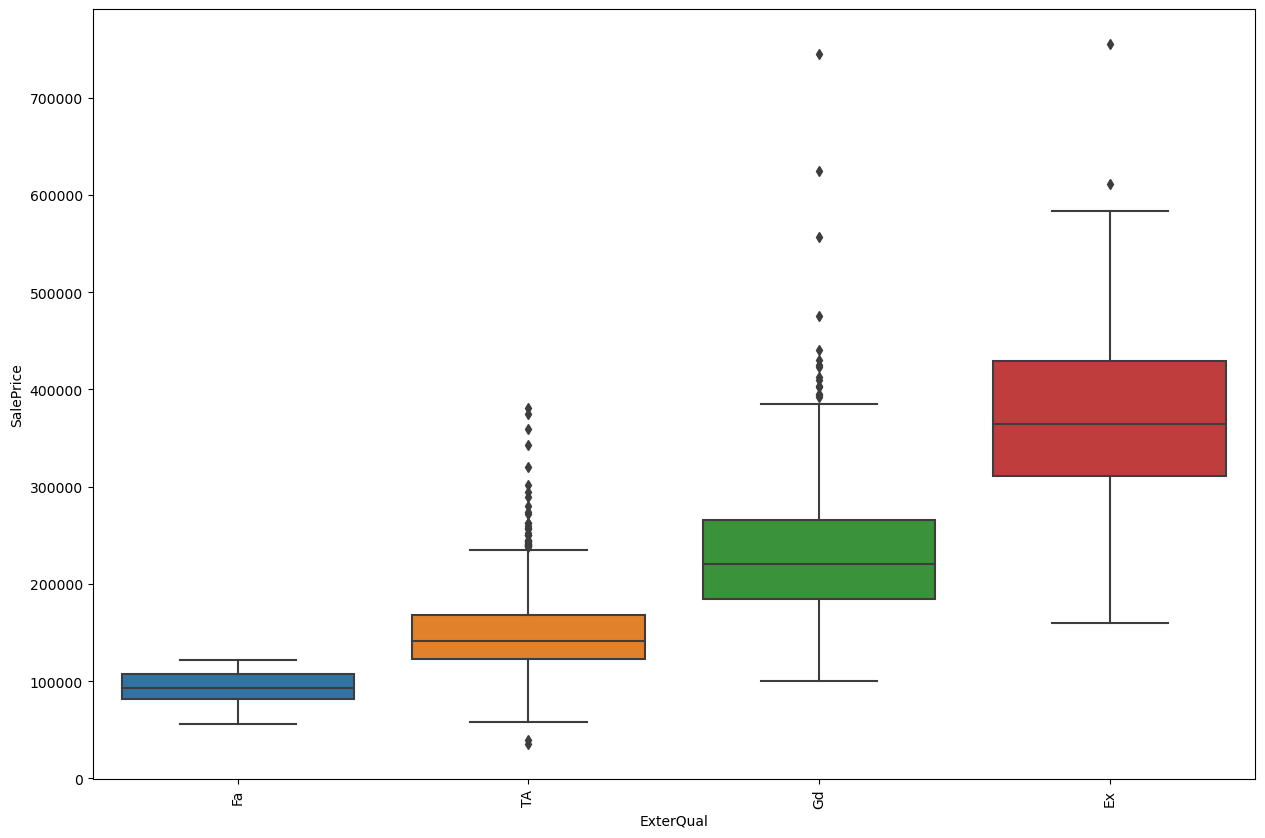

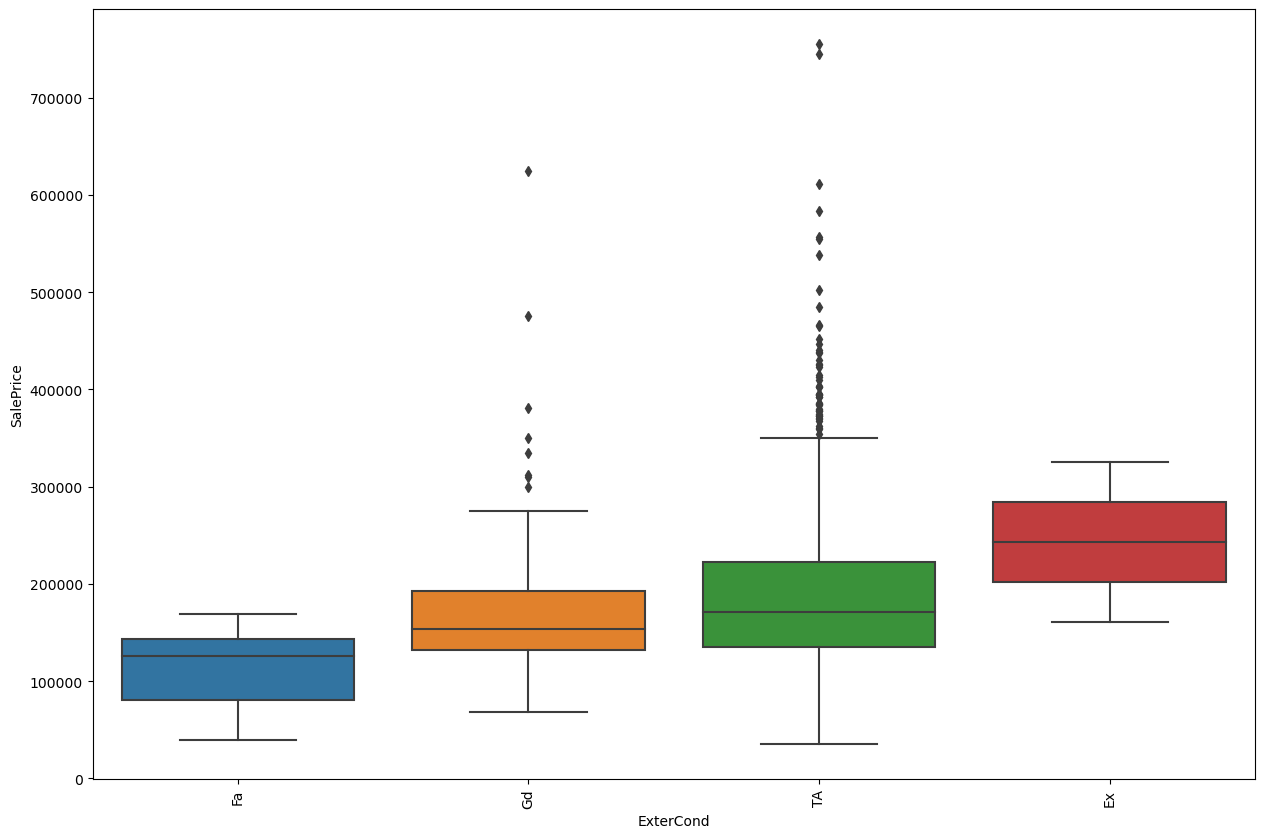

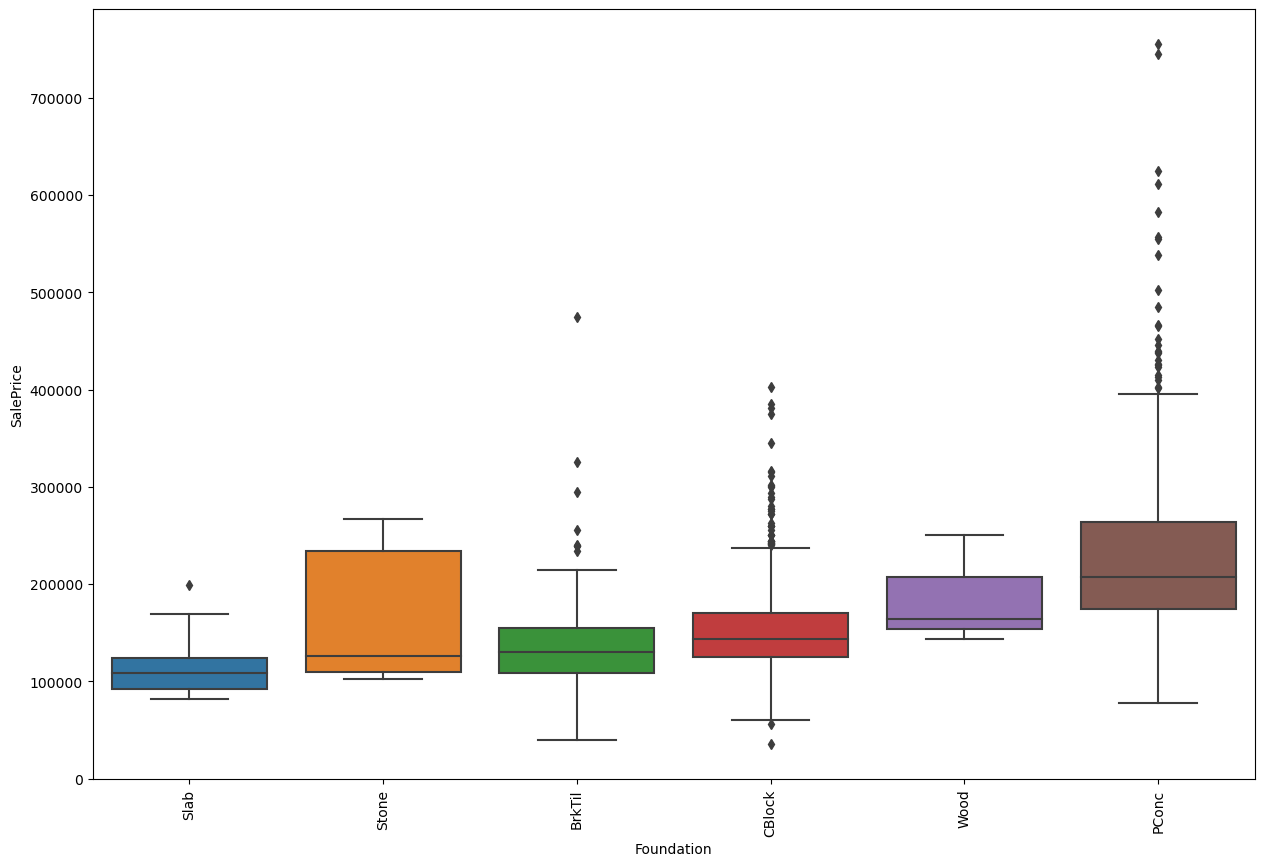

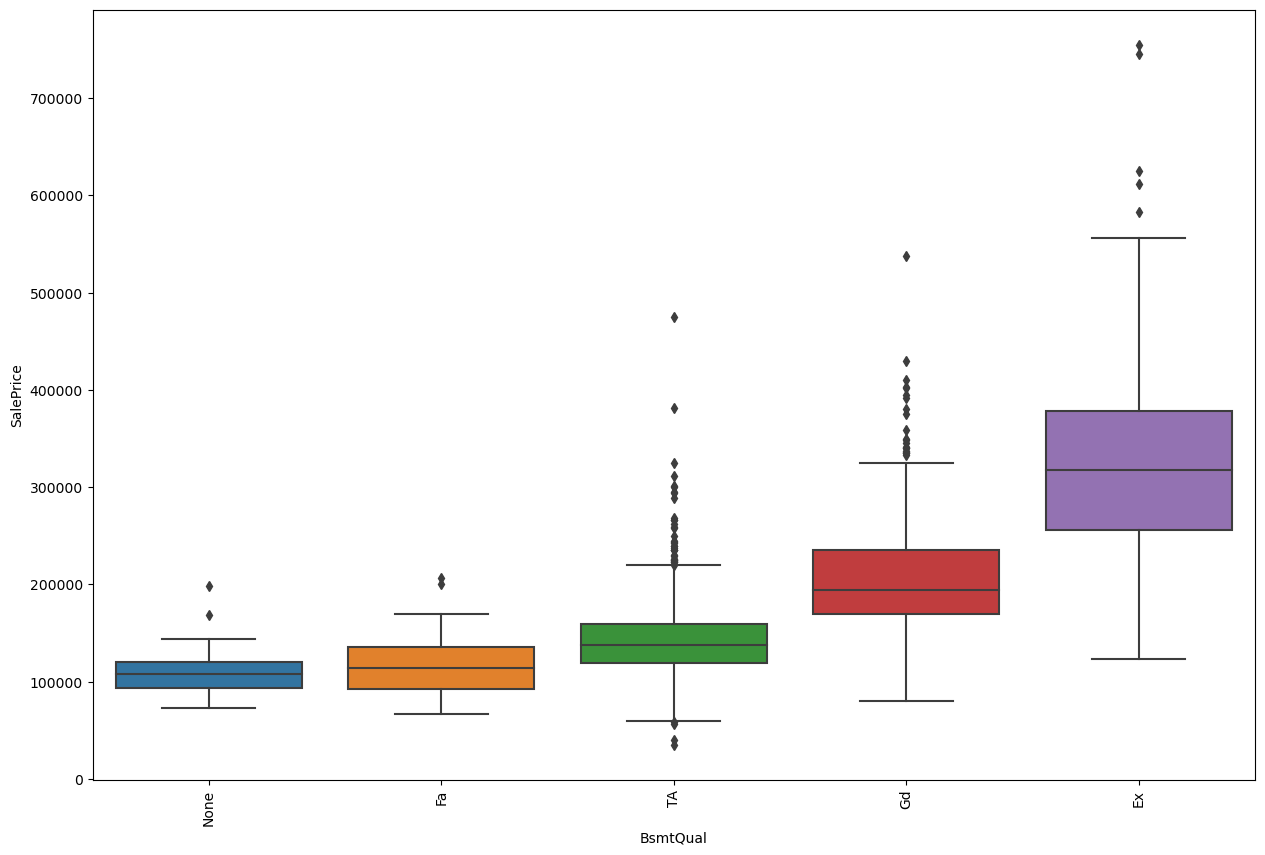

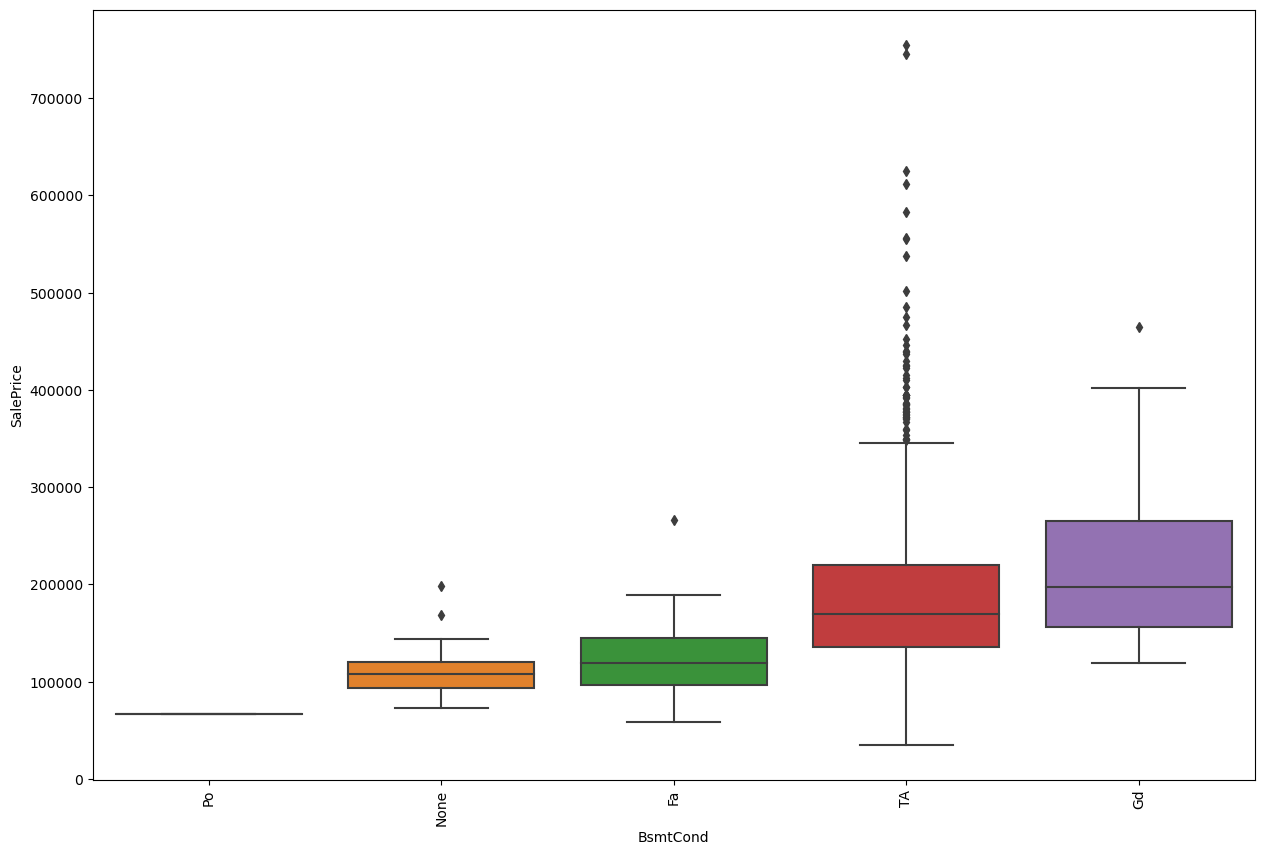

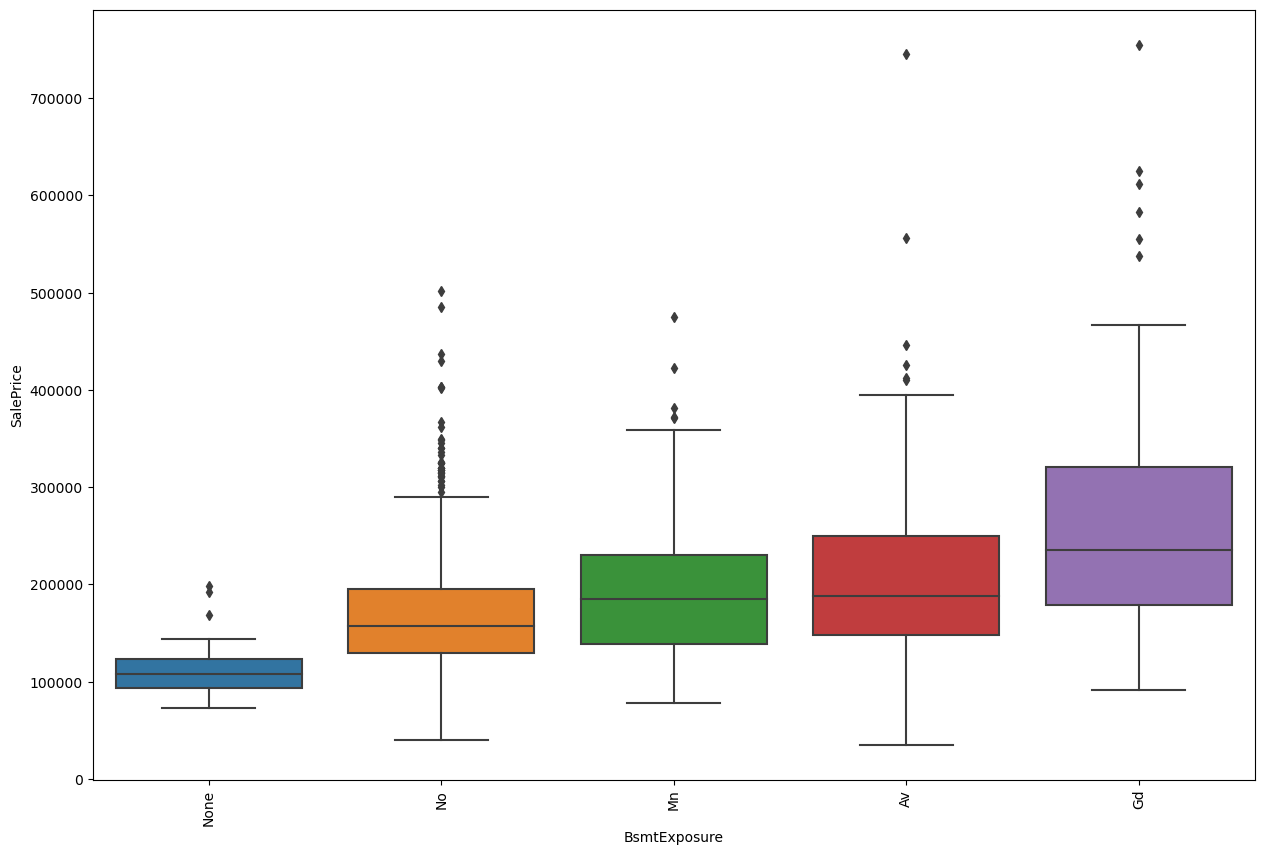

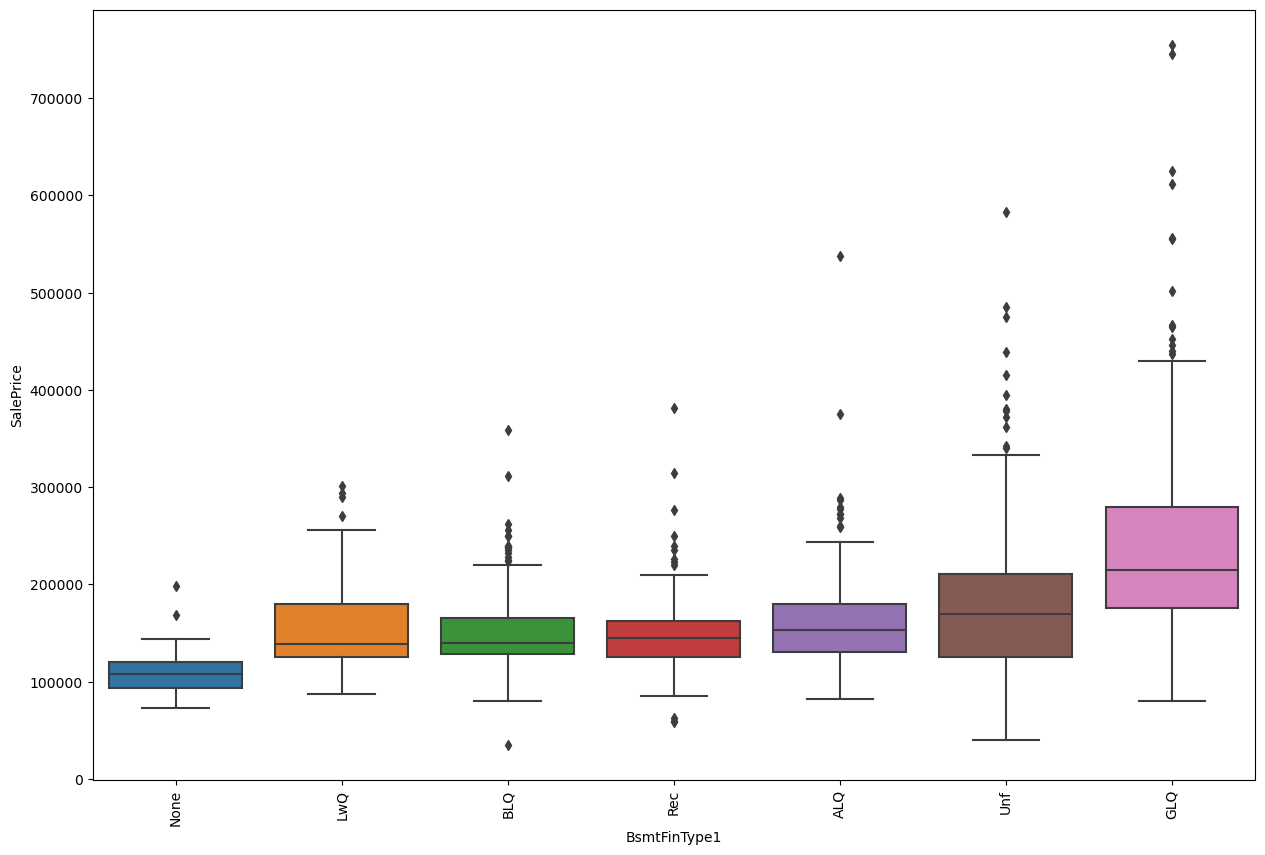

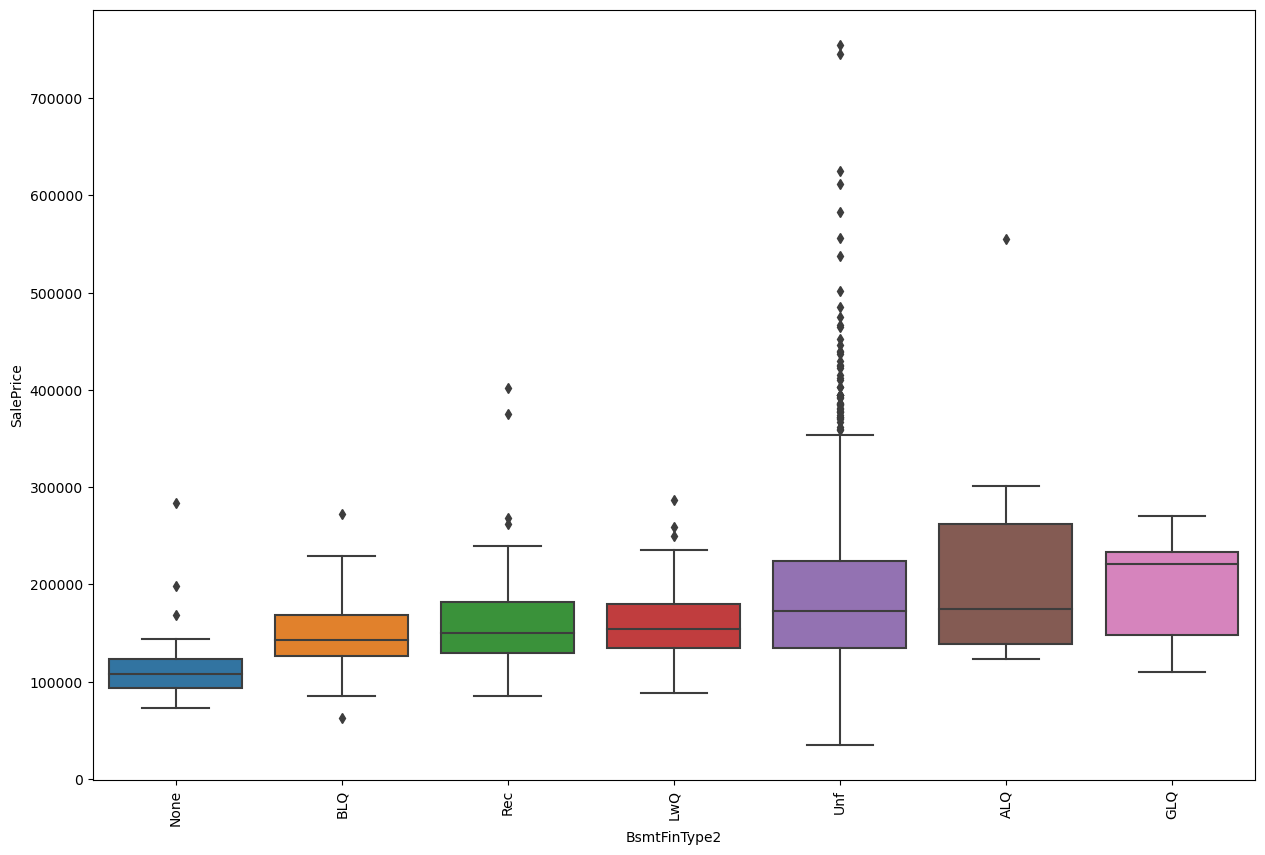

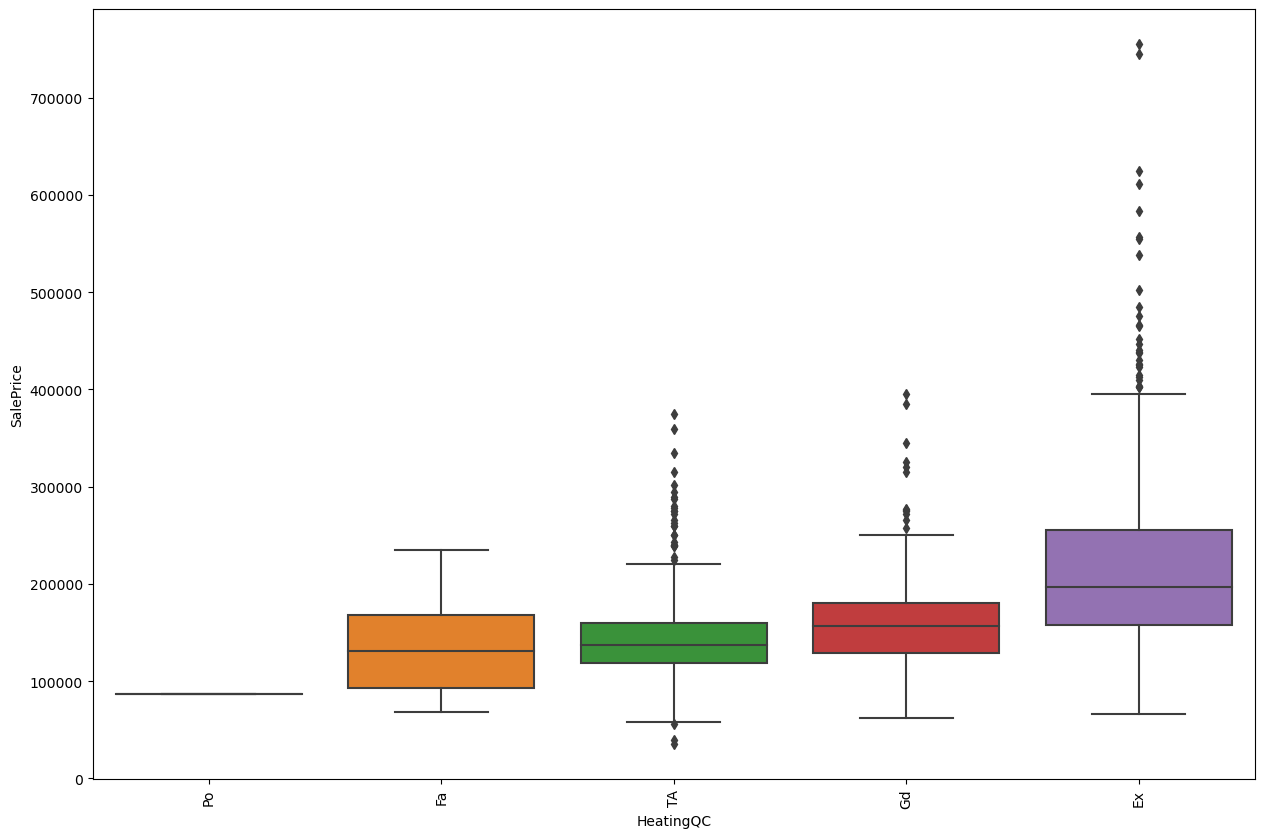

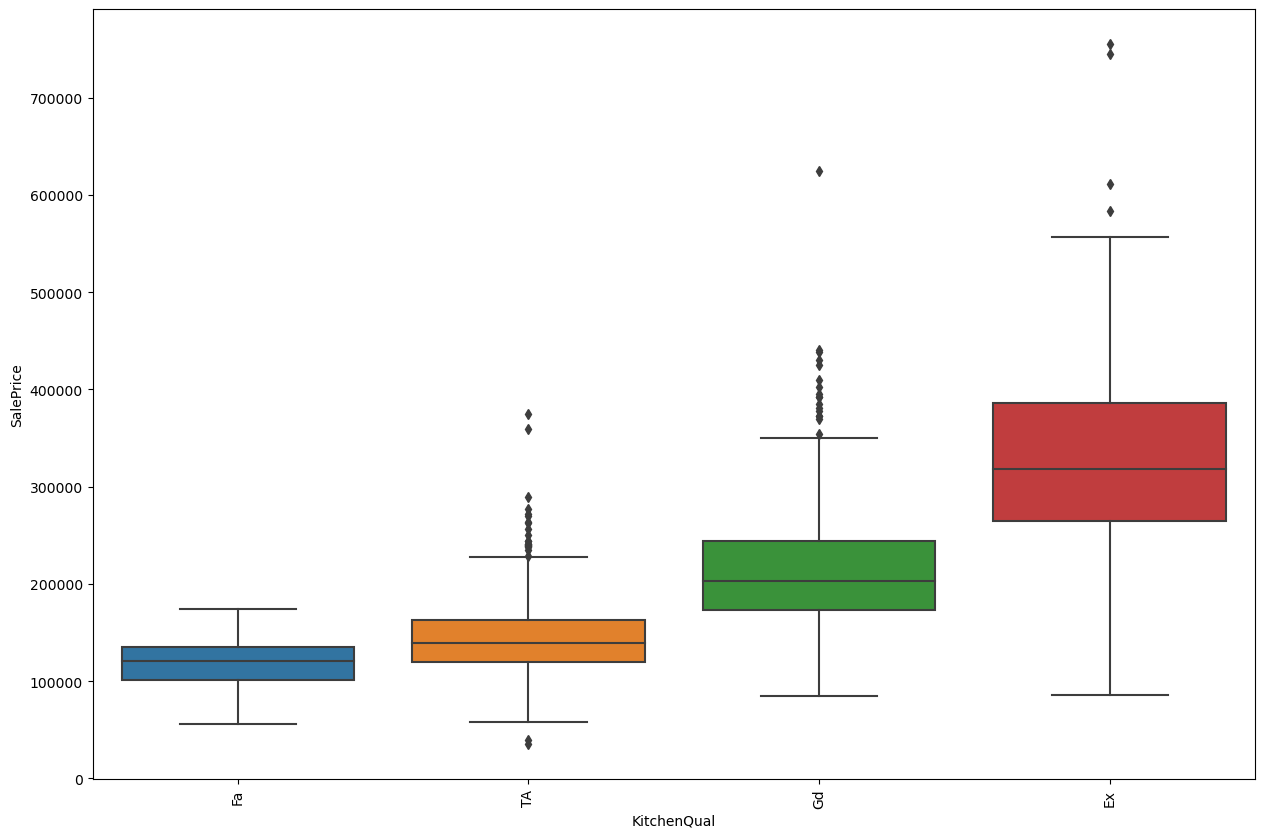

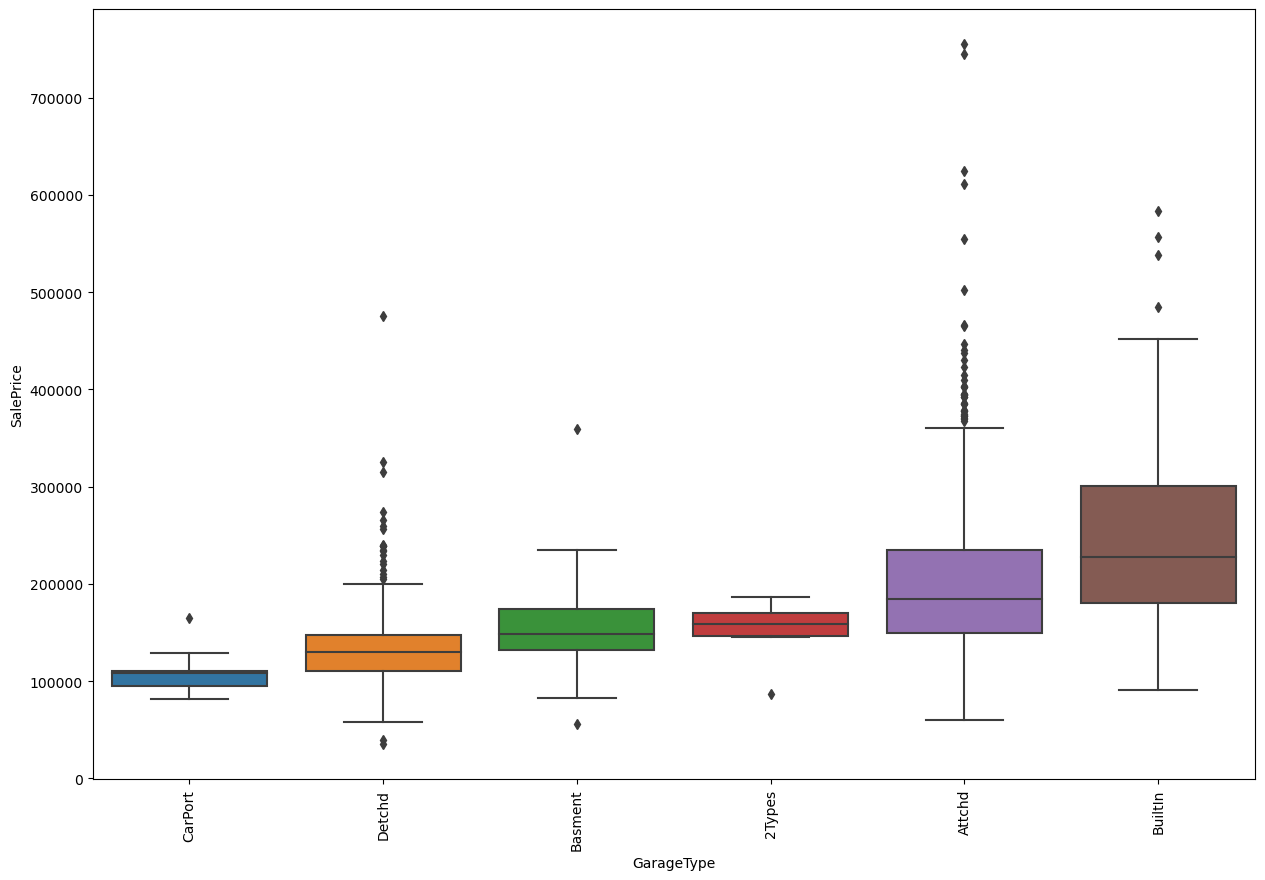

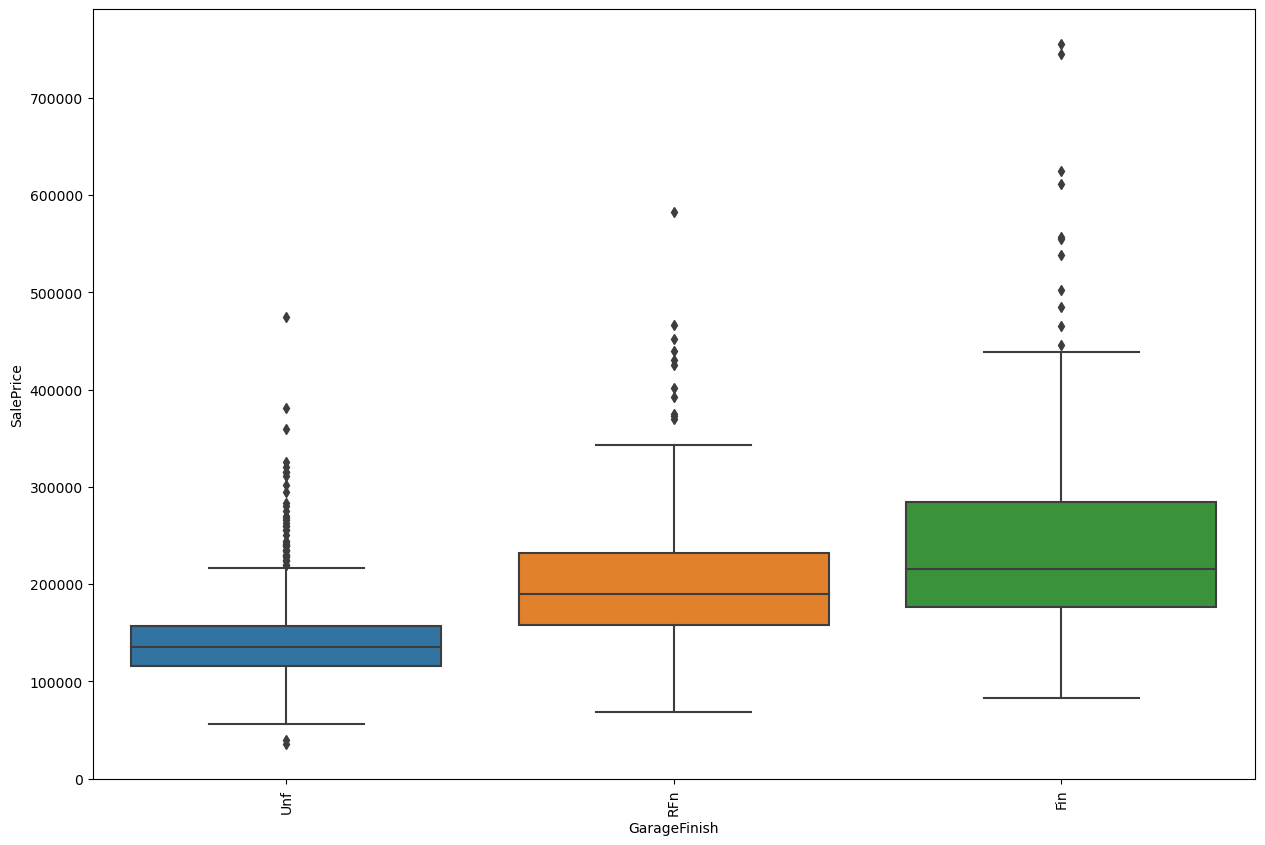

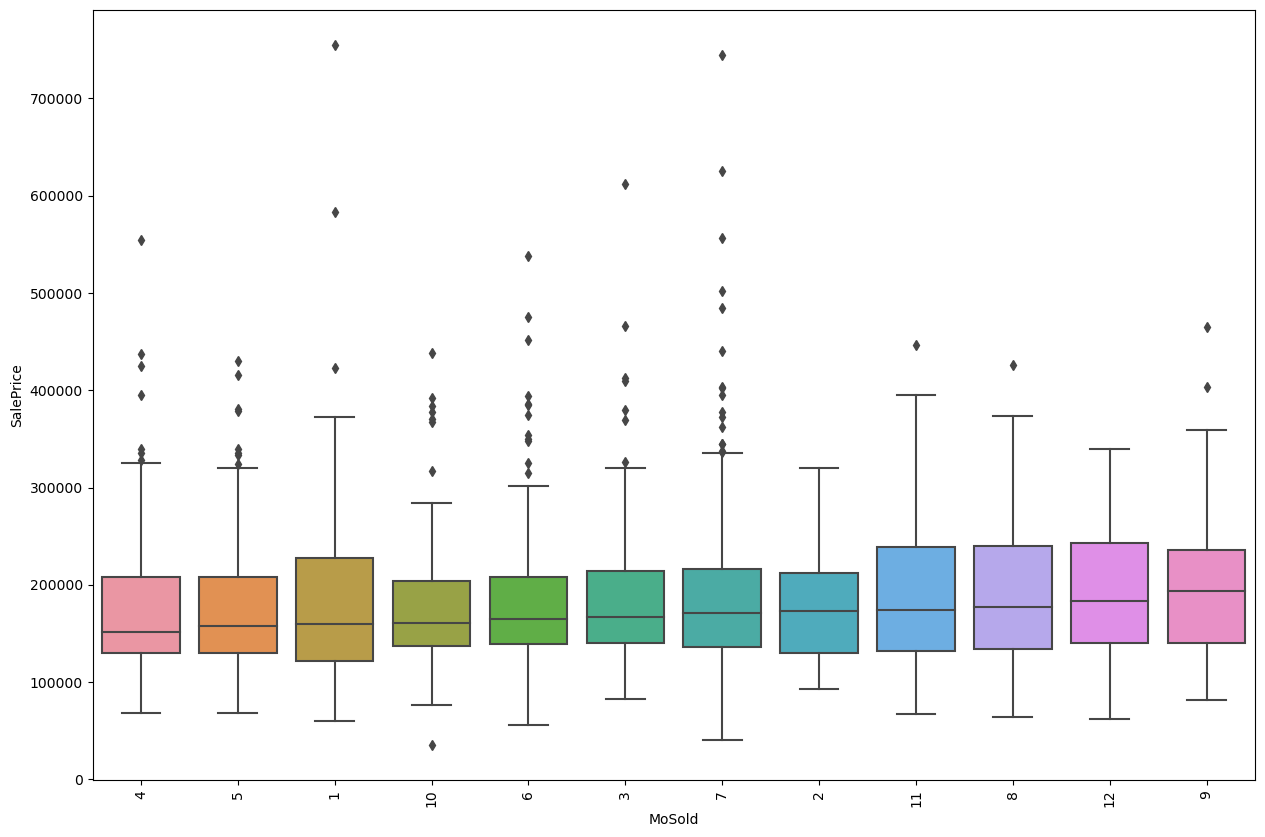

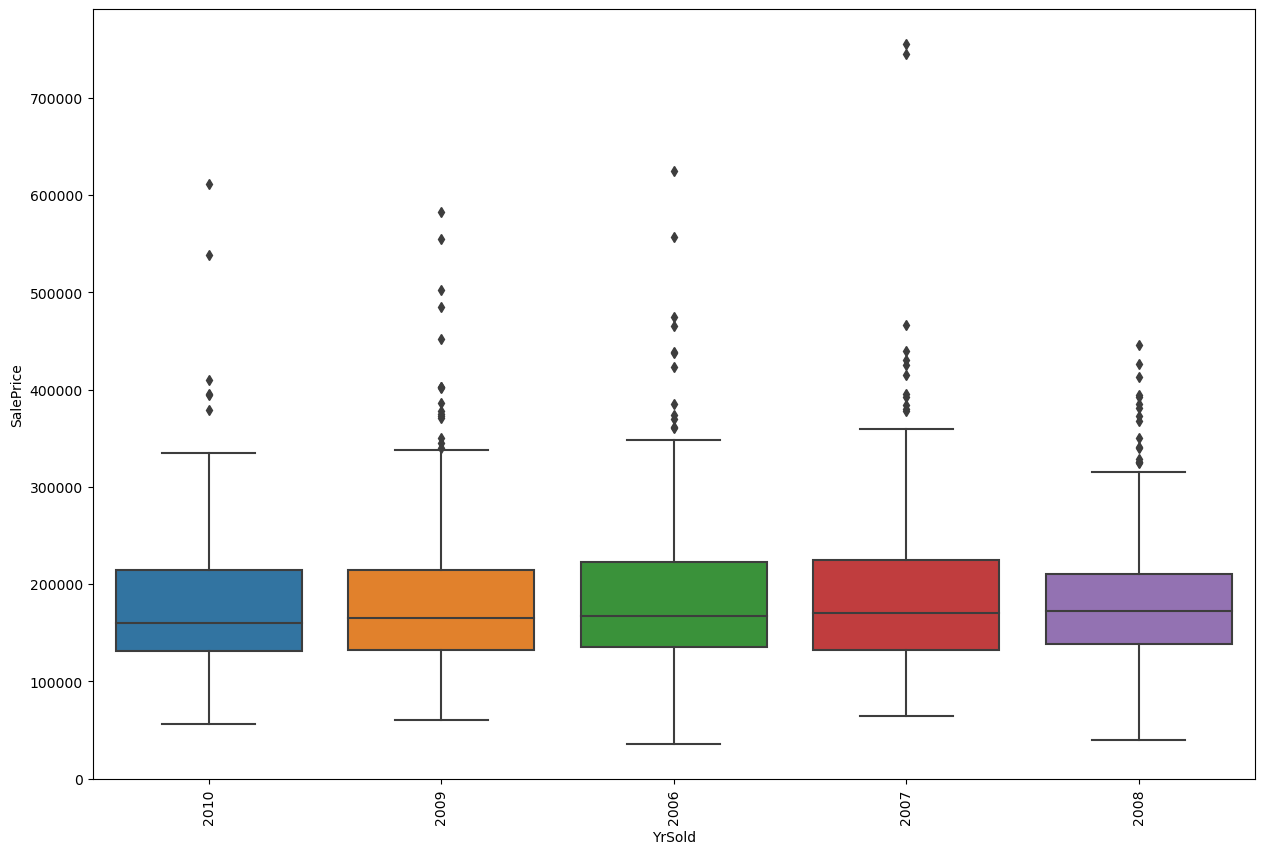

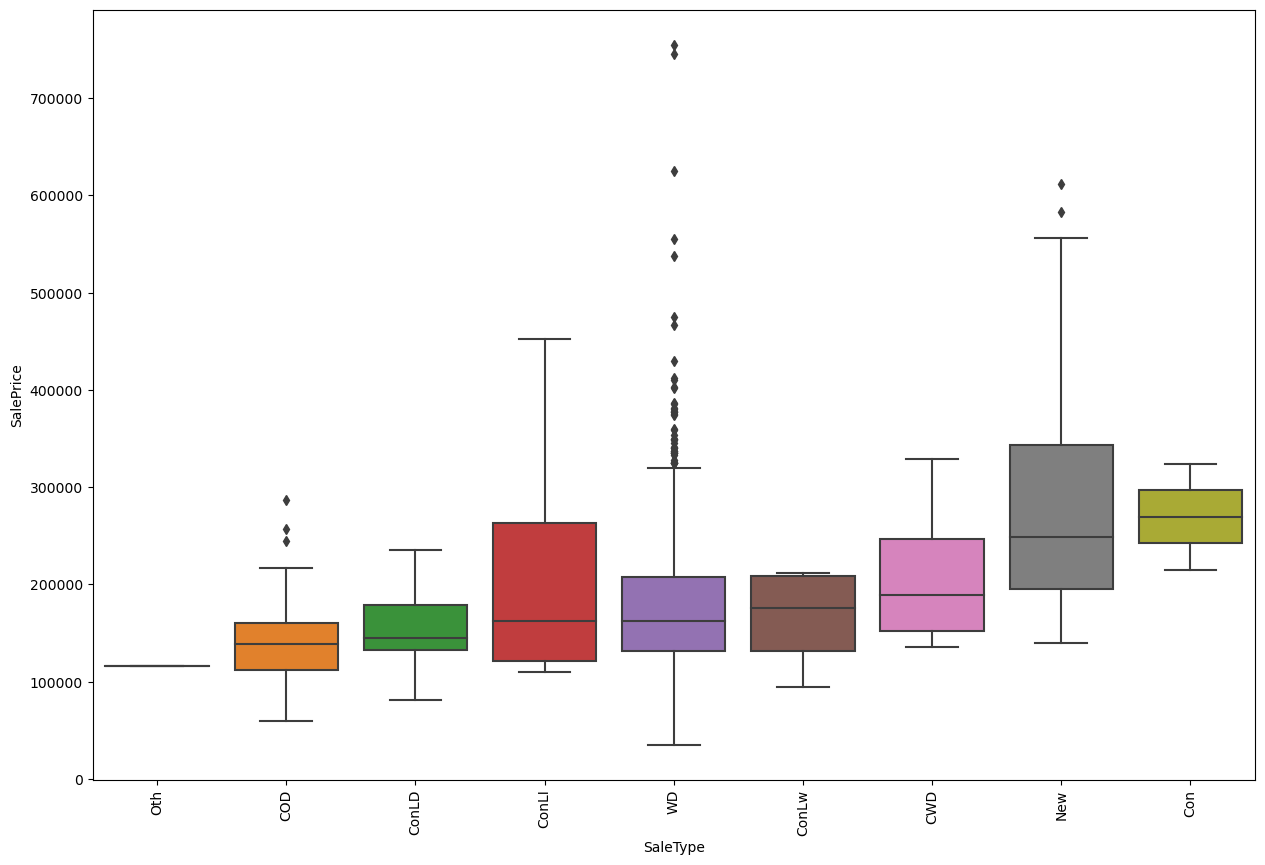

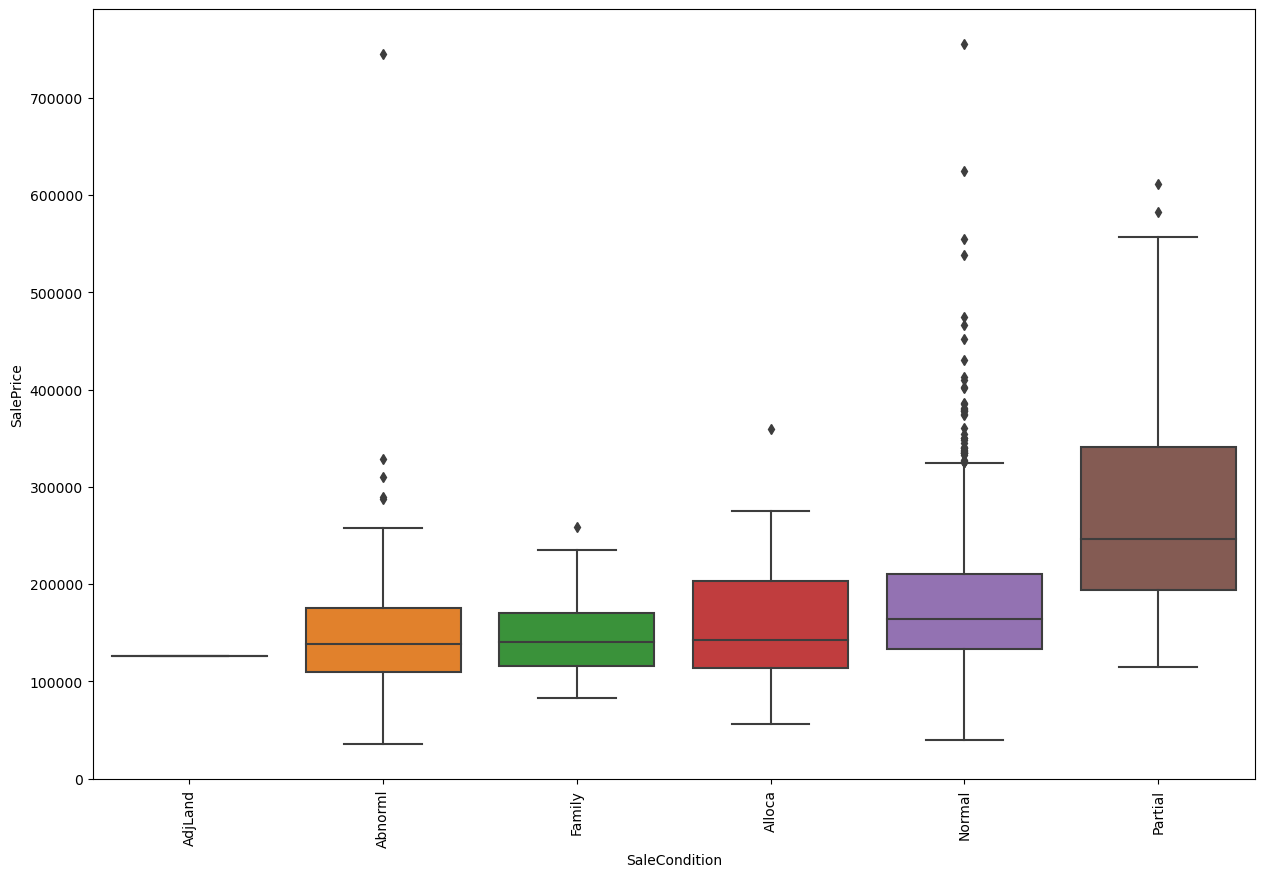

In [39]:
for col in categorical_cols:
    plt.figure(figsize=(15, 10))
    sns.boxplot(x=col, y='SalePrice', data=data, order=data.groupby([col])['SalePrice']
                .median().sort_values().index)
    plt.xticks(rotation=90)
    plt.show()

# Preparing data for modeling

In [40]:
continiousVar = list(data.select_dtypes(["int64","float64"]).columns)
categoricalVar = list(data.select_dtypes("object").columns)

In [41]:
#creating dummy variables for all categorical variables.
data = pd.concat([pd.get_dummies(data=data[categoricalVar], drop_first=True), data[continiousVar]], axis=1)
data.info(max_cols=600)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 196 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    MSZoning_FV               1379 non-null   uint8  
 1    MSZoning_RH               1379 non-null   uint8  
 2    MSZoning_RL               1379 non-null   uint8  
 3    MSZoning_RM               1379 non-null   uint8  
 4    LotShape_IR2              1379 non-null   uint8  
 5    LotShape_IR3              1379 non-null   uint8  
 6    LotShape_Reg              1379 non-null   uint8  
 7    LandContour_HLS           1379 non-null   uint8  
 8    LandContour_Low           1379 non-null   uint8  
 9    LandContour_Lvl           1379 non-null   uint8  
 10   LotConfig_CulDSac         1379 non-null   uint8  
 11   LotConfig_FR2             1379 non-null   uint8  
 12   LotConfig_FR3             1379 non-null   uint8  
 13   LotConfig_Inside          1379 non-null   uint

# Train Test Split

In [42]:
data_train, data_test = train_test_split(data, train_size=0.7, random_state=100)

Rescalling all continous variables using MinMaxScaler()

In [43]:
scaler = MinMaxScaler()
data_train[continiousVar] = scaler.fit_transform(data_train[continiousVar])
data_train.describe()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,YearBuilt_Diff,YearRemodAdd_Diff,GarageYrBlt_Diff
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,...,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,0.044560,0.008290,0.801036,0.140933,0.026943,0.008290,0.640415,0.031088,0.023834,0.904663,...,0.271755,0.133142,0.086141,0.039286,0.484597,0.448964,0.208706,0.280042,0.412729,0.297087
std,0.206442,0.090719,0.399428,0.348132,0.162001,0.090719,0.480128,0.173646,0.152611,0.293832,...,0.149703,0.172454,0.119052,0.111878,0.245978,0.334208,0.110942,0.225471,0.341703,0.239489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.168521,0.000000,0.000000,0.000000,0.363636,0.250000,0.137822,0.054264,0.100000,0.067961
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.257552,0.000000,0.051188,0.000000,0.454545,0.500000,0.183675,0.271318,0.266667,0.291262
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.331479,0.230769,0.127971,0.000000,0.636364,0.750000,0.249954,0.418605,0.716667,0.456311
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Making model using Multiple Linear Regression

Spliting Training to x_train and y_train

In [44]:
y_train = data_train.pop("SalePrice")
x_train = data_train

In [45]:
x_train.shape

(965, 195)

In [46]:
#Fitting line using x_train and y_train
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(x_train, y_train)

print("Y Intercept " + str(lm.intercept_))
print("Coefficents ")
print(lm.coef_)

Y Intercept 1497932770168.339
Coefficents 
[ 5.03578849e-02  4.96461710e-02  4.92071066e-02  3.98446237e-02
  1.69903674e-02 -3.02203841e-02 -2.03599466e-03  2.07445016e-02
  1.50451552e-02  1.58781262e-02  4.71992557e-03 -1.64021448e-02
 -3.03521684e-02 -3.94275893e-03 -7.91062938e-03  3.22395089e-02
  2.34822074e-02 -1.01572777e-04  4.19482209e-03  4.60280351e-02
 -1.65019911e-02 -3.40962339e-03  2.84260494e-02  1.57223516e-02
 -1.32881548e-02 -7.57896875e-04  2.83327296e-02  1.40392843e-03
  7.66210631e-02  5.01054678e-02 -3.08392764e-03 -1.92376869e-02
  2.70240085e-03  2.53577256e-02  3.08149050e-02  7.22412716e-02
 -1.12706201e-03 -4.52173248e-03 -8.26588309e-03  1.08607033e-02
 -4.39643492e-03  5.15252836e-03 -2.89664142e-02 -3.18408868e-03
 -5.54237668e-04 -6.77137291e-03 -2.09227888e-02 -1.56797149e-02
 -3.17454138e-02 -2.65778709e-02  9.58002438e-03  2.55245541e-02
 -9.72440874e-03 -4.02562600e-02 -2.26268955e-02  1.33503535e-02
  6.89579111e-03 -1.34454666e-02 -5.63660158e-0

In [47]:
#Trasforming scaler to test data
data_test[continiousVar] = scaler.transform(data_test[continiousVar])
data_test.describe()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,YearBuilt_Diff,YearRemodAdd_Diff,GarageYrBlt_Diff
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,0.053140,0.009662,0.792271,0.137681,0.036232,0.004831,0.586957,0.043478,0.024155,0.896135,...,0.268828,0.135564,0.087098,0.035383,0.485727,0.462560,0.208544,0.277871,0.401691,0.293654
std,0.224584,0.097937,0.406173,0.344982,0.187093,0.069421,0.492976,0.204178,0.153715,0.305454,...,0.142735,0.177872,0.119734,0.104407,0.243512,0.328875,0.107232,0.233248,0.338795,0.240483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006515,-0.007752,0.000000,-0.009709
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.184022,0.000000,0.000000,0.000000,0.363636,0.250000,0.136988,0.062016,0.104167,0.070388
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.257552,0.000000,0.045704,0.000000,0.454545,0.500000,0.184023,0.248062,0.250000,0.271845
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.340223,0.246566,0.120658,0.000000,0.636364,0.750000,0.258708,0.410853,0.683333,0.466019
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.864865,1.177198,0.764168,0.699275,1.000000,1.000000,0.819366,1.000000,1.000000,1.058252


In [48]:
#Spliting Training to x_test and y_test
y_test = data_test.pop("SalePrice")
x_test = data_test

Creating function to display R2 (R-Squared) RSS (Residual Sum of Squared) and MSE (Mean Squared Error)

In [49]:
def displayR2_RSS_MSE(y_pred_train, y_pred_test):
    metric = []
    
    r2_train_lr = r2_score(y_train, y_pred_train)
    print("R2_Train : " + str(r2_train_lr))
    metric.append(r2_train_lr)
    
    r2_test_lr = r2_score(y_test, y_pred_test)
    print("R2_Test : " + str(r2_test_lr))
    metric.append(r2_test_lr)
    
    print(" ")
    
    rss_train_lr = np.sum(np.square(y_train - y_pred_train))
    print("RSS_Train : " + str(rss_train_lr))
    metric.append(rss_train_lr)
    
    rss_test_lr = np.sum(np.square(y_test - y_pred_test))
    print("RSS_Test : " + str(rss_test_lr))
    metric.append(rss_test_lr)
    
    print(" ")
    
    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print("MSE_Train : " + str(mse_train_lr))
    metric.append(mse_train_lr)
    
    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print("MSE_Test : " + str(mse_test_lr))
    metric.append(mse_test_lr)
    
    return metric

In [50]:
#Prediction Using Multiple Linear Regression
y_pred_train = lm.predict(x_train)
y_pred_test = lm.predict(x_test)

metric_lr = displayR2_RSS_MSE(y_pred_train, y_pred_test)

R2_Train : 0.902610393871006
R2_Test : -4.548738196790147e+17
 
RSS_Train : 1.1555346687994064
RSS_Test : 2.1601961304509983e+18
 
MSE_Train : 0.001197445252641872
MSE_Test : 5217865049398547.0


**Note : As we can see model is clearly overfitted, performing well on the Train data(R2_Train) and not well on the Test data(R2_test). To solve this problem we will now use regularisation techniques called Ridge and Lasso Regression One By One.**

# Making Model Using Ridge Regression

In [51]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,7.0,8.0,9.0,10.0,15.0,17.0]}
folds = 5

In [52]:
#Getting Best alpha using GridSearchCV for Ridge
ridge = Ridge()

model_r_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_r_cv.fit(x_train, y_train)
model_r_cv.best_params_["alpha"]

Fitting 5 folds for each of 21 candidates, totalling 105 fits


7.0

In [53]:
#Making Model Using Ridge Regression
ridge = Ridge(alpha = 7.0)

ridge.fit(x_train, y_train)

y_pred_r_train = ridge.predict(x_train)
y_pred_r_test = ridge.predict(x_test)

metric_ri = displayR2_RSS_MSE(y_pred_r_train, y_pred_r_test)

R2_Train : 0.8864407486019447
R2_Test : 0.8346959590168714
 
RSS_Train : 1.3473886708151916
RSS_Test : 0.7850290217442069
 
MSE_Train : 0.0013962576899639292
MSE_Test : 0.0018962053665319005


**Note : As we can there no huge difference between train and test so we can say that ridge regression solves the problem of overfitting.**

In [54]:
#Making Model Using Lasso Regression
lasso = Lasso()

# cross validation
model_l_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_l_cv.fit(x_train, y_train)
model_l_cv.best_params_["alpha"]

Fitting 5 folds for each of 21 candidates, totalling 105 fits


0.0001

In [55]:
#Making Model Using Lasso Regression
lasso = Lasso(alpha=0.0001)
        
lasso.fit(x_train, y_train)

y_pred_l_train = lasso.predict(x_train)
y_pred_l_test = lasso.predict(x_test)

metric_la = displayR2_RSS_MSE(y_pred_l_train,y_pred_l_test)



R2_Train : 0.8952391846072628
R2_Test : 0.8358028942972097
 
RSS_Train : 1.2429945959290907
RSS_Test : 0.7797721852198851
 
MSE_Train : 0.001288077301480923
MSE_Test : 0.0018835076937678385


**Note : As we can see there is a addressable difference between train and test so we can say that lasso regression not solving the problem of overfitting.**

Fine tuning alpha value for better results

In [56]:
for i in [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001]:
    lasso = Lasso(alpha=i)

    lasso.fit(x_train, y_train)

    y_pred_l_train = lasso.predict(x_train)
    y_pred_l_test = lasso.predict(x_test)
    
    print("Alpha = " + str(i))
    print(" ")
    metric_la = displayR2_RSS_MSE(y_pred_l_train,y_pred_l_test)
    print(" ")

Alpha = 0.0001
 
R2_Train : 0.8952391846072628
R2_Test : 0.8358028942972097
 
RSS_Train : 1.2429945959290907
RSS_Test : 0.7797721852198851
 
MSE_Train : 0.001288077301480923
MSE_Test : 0.0018835076937678385
 
Alpha = 0.0002
 
R2_Train : 0.8860274717750605
R2_Test : 0.8383610430469478
 
RSS_Train : 1.3522922300373486
RSS_Test : 0.7676235347783142
 
MSE_Train : 0.001401339098484299
MSE_Test : 0.0018541631274838508
 
Alpha = 0.0003
 
R2_Train : 0.8776599197674319
R2_Test : 0.8374944115436009
 
RSS_Train : 1.4515738353555816
RSS_Test : 0.7717391684751005
 
MSE_Train : 0.0015042215910420534
MSE_Test : 0.0018641042716789867
 
Alpha = 0.0004
 
R2_Train : 0.869213351836814
R2_Test : 0.8328620918877875
 
RSS_Train : 1.5517929702730233
RSS_Test : 0.793738058194807
 
MSE_Train : 0.0016080756168632365
MSE_Test : 0.0019172416864608865
 
Alpha = 0.0005
 
R2_Train : 0.8607316445193033
R2_Test : 0.8260027955196263
 
RSS_Train : 1.6524290365387788
RSS_Test : 0.8263128620878395
 
MSE_Train : 0.001712361

As we can see than when alpha value is > "0.0004", the test and train values are getting decresed, so **from this we can conclude that the best alpha value of this model is 0.0004**

Lasso Model using alpha = 0.0004

In [57]:
lasso = Lasso(alpha=0.0004)

lasso.fit(x_train, y_train)

y_pred_l_train = lasso.predict(x_train)
y_pred_l_test = lasso.predict(x_test)

metric_la = displayR2_RSS_MSE(y_pred_l_train,y_pred_l_test)

R2_Train : 0.869213351836814
R2_Test : 0.8328620918877875
 
RSS_Train : 1.5517929702730233
RSS_Test : 0.793738058194807
 
MSE_Train : 0.0016080756168632365
MSE_Test : 0.0019172416864608865


Creating a table which contain all the metrics

In [58]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric_ri, name = 'Ridge Regression')
ls_metric = pd.Series(metric_la, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.026104e-01,0.886441,0.869213
1,R2 Score (Test),-4.548738e+17,0.834696,0.832862
2,RSS (Train),1.155535e+00,1.347389,1.551793
3,RSS (Test),2.160196e+18,0.785029,0.793738
4,MSE (Train),1.197445e-03,0.001396,0.001608
5,MSE (Test),5.217865e+15,0.001896,0.001917


From the above metric, we can observe the following things:
    - R^2 of Train and Test clearly says that there is a overfitting problem
    - Ridge Regression R2 on Train is 0.886 and R2_Test is 0.834, since the differe is 0.05 lets ignore this model
    - When we compare the r2 on Lasso Regression the Train set is also generalised and R2 of test set is also performing better.
    
**For this reasons we conclude that Lasso model is better when compated to Linear Regression and Ridge Regression**

Lets observe the changes in the coefficients after regularization

In [59]:
metric_cmp = pd.DataFrame(index=data_train.columns)
metric_cmp.rows = data_train.columns
metric_cmp['Linear'] = lm.coef_
metric_cmp['Ridge'] = ridge.coef_
metric_cmp['Lasso'] = lasso.coef_

In [60]:
pd.set_option('display.max_rows', None)
metric_cmp.head(20)

,Linear,Ridge,Lasso
MSZoning_FV,0.050358,0.007766,0.000000
MSZoning_RH,0.049646,0.000090,-0.000000
MSZoning_RL,0.049207,0.011044,0.004666
MSZoning_RM,0.039845,0.000681,-0.004872
LotShape_IR2,0.016990,0.012628,0.002810
LotShape_IR3,-0.030220,-0.016221,-0.000000
LotShape_Reg,-0.002036,-0.004305,-0.006048
LandContour_HLS,0.020745,0.011095,0.000000
LandContour_Low,0.015045,0.009376,0.000000
LandContour_Lvl,0.015878,0.010609,0.000683


From the above comparision, it is clearly now that features like MSZoning_FV, MSZoning_RH, MSZoning_RL, LotShape_IR2 are made 0 by Lasso Regression and these are used by Ridge

Lets check how many features are used by Lasso and Ridge Models

In [61]:
featuresUsedByLasso = list(metric_cmp[metric_cmp["Lasso"] != 0.0].index)
lasso_features_used = len(featuresUsedByLasso)
print(f"{lasso_features_used} features are used by Lasso Model")

70 features are used by Lasso Model


In [62]:
featuresUsedByRidge = list(metric_cmp[metric_cmp["Ridge"] != 0.0].index)
ridge_features_used = len(featuresUsedByRidge)
print(f"{ridge_features_used} features are used by Ridge Model")

192 features are used by Ridge Model


In [63]:
metric_cmp["Lasso"].sort_values()[:5]

KitchenQual_TA   -0.036634
KitchenQual_Gd   -0.036049
MSSubClass       -0.031938
BsmtQual_Gd      -0.027841
BsmtQual_TA      -0.023607
Name: Lasso, dtype: float64

In [64]:
metric_cmp["Lasso"].sort_values()[-5:]

OverallCond             0.033844
Neighborhood_NoRidge    0.062137
GarageCars              0.062688
OverallQual             0.150531
GrLivArea               0.277405
Name: Lasso, dtype: float64

In [65]:
metric_cmp["Ridge"].sort_values()[:5]

BsmtQual_Gd      -0.037648
KitchenQual_TA   -0.037467
KitchenQual_Gd   -0.037465
BsmtQual_TA      -0.036305
BsmtQual_Fa      -0.027641
Name: Ridge, dtype: float64

In [66]:
metric_cmp["Ridge"].sort_values()[-5:]

GarageCars              0.050994
Neighborhood_NoRidge    0.060320
2ndFlrSF                0.064053
GrLivArea               0.065716
OverallQual             0.085743
Name: Ridge, dtype: float64

### Conclusion

- Few important variable for model building are as follows and these show significant effect in increase in the sales price
        1. "Garage Cars"
        2. "Neighbourhood_NoRidge"
        3. "2ndFlrSF"
        4. "GrLivArea"
        5. "OverallQual"
        6. "BsmtQual_Gd"
        7. "KitchenQual_TA"
        8. "KitchenQual_Gd"
        9. "BsmtQual_TA"
        10. "BsmtQual_Fa"
- Optimal value of lambda for Ridge Regression is "7.0"
- Optimal value of lambda for Lasso Regression is "0.0004"


In [67]:
print("***********************The End of Model Building************************")

***********************The End of Model Building************************


# Below set of code is used for answering Subjective questions

# Doubling the Alpha Values

## Ridge Model

In [68]:
#Ridge Regression
ridge2x = Ridge(alpha=14)

ridge2x.fit(x_train, y_train)

y_pred_r_train = ridge2x.predict(x_train)
y_pred_r_test = ridge2x.predict(x_test)

metric_ri_2x = displayR2_RSS_MSE(y_pred_r_train, y_pred_r_test)

R2_Train : 0.8730889759035121
R2_Test : 0.8304667285979249
 
RSS_Train : 1.5058084124715343
RSS_Test : 0.805113640358311
 
MSE_Train : 0.001560423225359103
MSE_Test : 0.001944718938063553


In [69]:
#Lasso Regression
lasso2x = Lasso(alpha=0.0008)

lasso2x.fit(x_train, y_train)

y_pred_l_train = lasso2x.predict(x_train)
y_pred_l_test = lasso2x.predict(x_test)

metric_la_2x = displayR2_RSS_MSE(y_pred_l_train,y_pred_l_test)

R2_Train : 0.8404789610386157
R2_Test : 0.8075377002866366
 
RSS_Train : 1.892728580076908
RSS_Test : 0.9140036139953919
 
MSE_Train : 0.0019613767669190755
MSE_Test : 0.002207738198056502


In [70]:
rg_2x_metric = pd.Series(metric_ri_2x, name = 'Ridge 2x')
ls_2x_metric = pd.Series(metric_la_2x, name = 'Lasso 2x')


final_metric_2x = pd.concat([lr_metric, rg_metric, ls_metric,rg_2x_metric,ls_2x_metric], axis = 1)
                                                                                  
final_metric_2x

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Ridge 2x,Lasso 2x
0,R2 Score (Train),9.026104e-01,0.886441,0.869213,0.873089,0.840479
1,R2 Score (Test),-4.548738e+17,0.834696,0.832862,0.830467,0.807538
2,RSS (Train),1.155535e+00,1.347389,1.551793,1.505808,1.892729
3,RSS (Test),2.160196e+18,0.785029,0.793738,0.805114,0.914004
4,MSE (Train),1.197445e-03,0.001396,0.001608,0.001560,0.001961
5,MSE (Test),5.217865e+15,0.001896,0.001917,0.001945,0.002208


In [71]:
metric_cmp['Ridge2x'] = ridge2x.coef_
metric_cmp['Lasso2x'] = lasso2x.coef_

In [72]:
#Few important predict variables after doubling alpha value
metric_cmp["Lasso2x"].sort_values()[:3]

KitchenQual_TA   -0.033696
KitchenQual_Gd   -0.031712
MSSubClass       -0.025752
Name: Lasso2x, dtype: float64

In [73]:
metric_cmp["Lasso2x"].sort_values()[-3:]

GarageCars     0.064547
OverallQual    0.174345
GrLivArea      0.207561
Name: Lasso2x, dtype: float64

In [74]:
metric_cmp["Ridge2x"].sort_values()[:3]

KitchenQual_TA   -0.034449
KitchenQual_Gd   -0.034404
BsmtQual_Gd      -0.034009
Name: Ridge2x, dtype: float64

In [75]:
metric_cmp["Ridge2x"].sort_values()[-3:]

GrLivArea               0.050627
Neighborhood_NoRidge    0.052168
OverallQual             0.069813
Name: Ridge2x, dtype: float64

## Question 3:

Removing top predictors, According to the model build above the imp predictors are: GrLivArea,OverallQual,GarageCars,Neighborhood_NoRidge,TotRmsAbvGrd

In [76]:
#Removing above columns from X_train
x_train_copy = x_train #copying the dataset

In [77]:
x_train_copy.drop(['GrLivArea','OverallQual','GarageCars','Neighborhood_NoRidge','TotRmsAbvGrd'], axis=1,inplace=True)
x_train_copy.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl',
       ...
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'YearBuilt_Diff',
       'YearRemodAdd_Diff', 'GarageYrBlt_Diff'],
      dtype='object', length=190)

In [78]:
#Removing above columns from x_test
x_test_copy = x_test #copying the dataset

In [79]:
x_test_copy.drop(['GrLivArea','OverallQual','GarageCars','Neighborhood_NoRidge','TotRmsAbvGrd'], axis=1,inplace=True)
#x_train_copy.shape
#x_train_copy.columns.GrLivArea
x_test_copy.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl',
       ...
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'YearBuilt_Diff',
       'YearRemodAdd_Diff', 'GarageYrBlt_Diff'],
      dtype='object', length=190)

In [80]:
lassoQ3 = Lasso(alpha=0.0004)

lassoQ3.fit(x_train_copy, y_train)

y_pred_3_train = lassoQ3.predict(x_train_copy)
y_pred_3_test = lassoQ3.predict(x_test_copy)

metric_la_Q3 = displayR2_RSS_MSE(y_pred_3_train,y_pred_3_test)

R2_Train : 0.8468934928373799
R2_Test : 0.819075269906546
 
RSS_Train : 1.8166196997537793
RSS_Test : 0.8592116867191101
 
MSE_Train : 0.0018825074608847454
MSE_Test : 0.0020753905476307006


In [81]:
ls_3_metric = pd.Series(lassoQ3.coef_,index=x_train_copy.columns)

In [82]:
ls_3_metric.sort_values()[:5]

KitchenQual_TA   -0.049428
KitchenQual_Gd   -0.047920
MSSubClass       -0.038090
KitchenQual_Fa   -0.037063
BsmtQual_TA      -0.036107
dtype: float64

In [83]:
ls_3_metric.sort_values()[-5:]

FullBath       0.035485
OverallCond    0.038260
GarageArea     0.070468
2ndFlrSF       0.155988
1stFlrSF       0.278392
dtype: float64

According to above data after removing earier top 5 variables the current 5 most important variables are:
1. "1stFlrSF"
2. "2ndFlrSF"
3. "GarageArea"
4. "OverallCond"
5. "FullBath"
6. "KitchenQual_TA"
7. "KitchenQual_Gd"
8. "MSSubClass"
9. "KitchenQual_Fa"
10."BsmtQual_TA"